In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
# import torch
# import pandas as pd
# import numpy as np
# from transformers import BertTokenizer, BertModel
# from torch.utils.data import Dataset, DataLoader
# from sklearn.metrics import accuracy_score

# # Define the device to use for training
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Load the datasets
# train_data = pd.read_csv("/content/drive/MyDrive/NEEWWWWW/DATA_NEW/PC/1000/train_800.csv")
# test_data = pd.read_csv("/content/drive/MyDrive/NEEWWWWW/DATA_NEW/PC/1000/test_200.csv")

# # Define the BERT model and tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
# model.to(device)

# # Define the dataset class
# class CustomDataset(Dataset):
#     def __init__(self, df):
#         self.df = df
#         self.tokenizer = tokenizer
    
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         text = self.df.iloc[idx]['text']
#         label = self.df.iloc[idx]['label']
        
#         inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
#         input_ids = inputs['input_ids'].squeeze(0)
#         attention_mask = inputs['attention_mask'].squeeze(0)
        
#         return {'input_ids': input_ids.to(device), 'attention_mask': attention_mask.to(device), 'label': torch.tensor(label).to(device)}

# # Define the data loaders
# train_dataset = CustomDataset(train_data)
# test_dataset = CustomDataset(test_data)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# # Define the training and testing functions
# def train(model, train_loader, optimizer, criterion):
#     model.train()
#     train_loss = 0
#     train_acc = 0
#     total = 0
    
#     for batch in train_loader:
#         input_ids = batch['input_ids']
#         attention_mask = batch['attention_mask']
#         labels = batch['label']
        
#         optimizer.zero_grad()
#         outputs = model(input_ids, attention_mask=attention_mask)
#         logits = outputs.last_hidden_state[:, 0, :]
#         loss = criterion(logits, labels)
        
#         loss.backward()
#         optimizer.step()
        
#         train_loss += loss.item() * len(input_ids)
#         train_acc += accuracy_score(labels.cpu().numpy(), np.argmax(logits.cpu().detach().numpy(), axis=1)) * len(input_ids)
#         total += len(input_ids)
    
#     return train_loss / total, train_acc / total

# def test(model, test_loader, criterion):
#     model.eval()
#     test_loss = 0
#     test_acc = 0
#     total = 0
#     hidden_states = [[] for _ in range(12)]
    
#     with torch.no_grad():
#         for batch in test_loader:
#             input_ids = batch['input_ids']
#             attention_mask = batch['attention_mask']
#             labels = batch['label']
            
#             outputs = model(input_ids, attention_mask=attention_mask)
#             logits = outputs.last_hidden_state[:, 0, :]
#             loss = criterion(logits, labels)
            
#             test_loss += loss.item() * len(input_ids)
#             test_acc += accuracy_score(labels.cpu().numpy(), np.argmax(logits.cpu().detach().numpy(), axis=1)) * len(input_ids)
#             total += len(input_ids)
            
#             for i in range(12):
#                 hidden_states[i].append(outputs.hidden_states[i].cpu().detach().numpy())
    
#     hidden_states = [np.concatenate(layer) for layer in hidden_states]
    
#     return test_loss / total, test_acc / total, hidden_states

# # Define the optimizer and loss function
# optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
# criterion = torch.nn.CrossEntropyLoss()

# # Train the model for 5 epochs
# for epoch in range(20):
#     train_loss, train_acc = train(model, train_loader, optimizer, criterion)
#     test_loss, test_acc, hidden_states = test(model, test_loader, criterion)
    
#     print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f} - Train Acc: {train_acc*100:.4f} - Test Acc: {test_acc*100:.4f}")
    
    
#     # Save the hidden layer outputs for this epoch
#     for i, layer in enumerate(hidden_states):
#         np.save(f"hidden_layer_{i}_train.npy", layer) 

#     # Save the hidden layer outputs for this epoch
#     for i, layer in enumerate(hidden_states):
#         np.save(f"hidden_layer_{i}_test.npy", layer)       

In [40]:
import torch
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score

# Define the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/NEEWWWWW/DATA_NEW/PC/1000/train_800.csv")
test_data = pd.read_csv("/content/drive/MyDrive/NEEWWWWW/DATA_NEW/PC/1000/test_200.csv")

# Define the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model.to(device)

# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.df.iloc[idx]['text']
        label = self.df.iloc[idx]['label']
        
        inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)
        
        return {'input_ids': input_ids.to(device), 'attention_mask': attention_mask.to(device), 'label': torch.tensor(label).to(device)}

# Define the data loaders
train_dataset = CustomDataset(train_data)
test_dataset = CustomDataset(test_data)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the training and testing functions
def train(model, train_loader, optimizer, criterion):
    model.train()
    train_loss = 0
    train_acc = 0
    total = 0
    layer_train_loss_data = []
    layer_train_acc_data = []
    
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.last_hidden_state[:, 0, :]
        loss = criterion(logits, labels)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * len(input_ids)
        train_acc += accuracy_score(labels.cpu().numpy(), np.argmax(logits.cpu().detach().numpy(), axis=1)) * len(input_ids)
        total += len(input_ids)
        
        for i in range(12):
            # Calculate the loss and accuracy for this layer
            layer_logits = outputs.hidden_states[i][:, 0, :]
            layer_loss = criterion(layer_logits, labels)
            layer_preds = np.argmax(layer_logits.cpu().detach().numpy(), axis=1)
            layer_labels = labels.cpu().numpy()
            layer_acc = accuracy_score(layer_labels, layer_preds)
            layer_train_loss_data.append(layer_loss.item())
            layer_train_acc_data.append(layer_acc)

    # Print the loss and accuracy for each layer
    for i in range(12):
        layer_train_loss = np.mean(layer_train_loss_data[i::12])
        layer_train_acc = np.mean(layer_train_acc_data[i::12])
        print(f"Epoch {epoch+1} - Layer {i+1} - Train Loss: {layer_train_loss:.4f} - Train Acc: {layer_train_acc*100:.4f}")
    
    return train_loss / total, train_acc / total


def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    test_acc = 0
    total = 0
    hidden_states = [[] for _ in range(12)]
    layer_test_loss_data = []
    layer_test_acc_data = []
    
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['label']
            
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.last_hidden_state[:, 0, :]
            loss = criterion(logits, labels)
            
            test_loss += loss.item() * len(input_ids)
            test_acc += accuracy_score(labels.cpu().numpy(), np.argmax(logits.cpu().detach().numpy(), axis=1)) * len(input_ids)
            total += len(input_ids)
            
            for i in range(12):
                hidden_states[i].append(outputs.hidden_states[i].cpu().detach().numpy())
                
                # Calculate the loss and accuracy for this layer
                layer_logits = outputs.hidden_states[i][:, 0, :]
                layer_loss = criterion(layer_logits, labels)
                layer_preds = np.argmax(layer_logits.cpu().detach().numpy(), axis=1)
                layer_labels = labels.cpu().numpy()
                layer_acc = accuracy_score(layer_labels, layer_preds)
                layer_test_loss_data.append(layer_loss.item())
                layer_test_acc_data.append(layer_acc)

    # Print the loss and accuracy for each layer
    for i in range(12):
        layer_test_loss = np.mean(layer_test_loss_data[i::12])
        layer_test_acc = np.mean(layer_test_acc_data[i::12])
        print(f"Epoch {epoch+1} - Layer {i+1} - Test Loss: {layer_test_loss:.4f} - Test Acc: {layer_test_acc*100:.4f}")
        
    return test_loss / total, test_acc / total, hidden_states

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Train the model for 10 epochs
for epoch in range(30):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f} - Train Acc: {train_acc*100:.4f}")
    
    test_loss, test_acc, hidden_states = test(model, test_loader, criterion)
    print(f"Epoch {epoch+1} - Test Loss: {test_loss:.4f} - Test Acc: {test_acc*100:.4f}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1 - Layer 1 - Train Loss: 6.8397 - Train Acc: 0.0000
Epoch 1 - Layer 2 - Train Loss: 6.5986 - Train Acc: 0.0000
Epoch 1 - Layer 3 - Train Loss: 6.6670 - Train Acc: 0.0000
Epoch 1 - Layer 4 - Train Loss: 6.5618 - Train Acc: 0.0000
Epoch 1 - Layer 5 - Train Loss: 6.3671 - Train Acc: 1.6250
Epoch 1 - Layer 6 - Train Loss: 6.4209 - Train Acc: 0.3750
Epoch 1 - Layer 7 - Train Loss: 6.2987 - Train Acc: 6.6250
Epoch 1 - Layer 8 - Train Loss: 5.9256 - Train Acc: 18.8750
Epoch 1 - Layer 9 - Train Loss: 5.7430 - Train Acc: 17.7500
Epoch 1 - Layer 10 - Train Loss: 5.4356 - Train Acc: 26.1250
Epoch 1 - Layer 11 - Train Loss: 5.0350 - Train Acc: 28.2500
Epoch 1 - Layer 12 - Train Loss: 3.9123 - Train Acc: 35.6250
Epoch 1 - Train Loss: 3.2439 - Train Acc: 42.6250
Epoch 1 - Layer 1 - Test Loss: 6.7726 - Test Acc: 0.0000
Epoch 1 - Layer 2 - Test Loss: 6.5521 - Test Acc: 0.0000
Epoch 1 - Layer 3 - Test Loss: 6.5321 - Test Acc: 0.0000
Epoch 1 - Layer 4 - Test Loss: 6.2493 - Test Acc: 0.0000
Epoch 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1 - Layer 1 - Train Loss: 6.8418 - Train Acc: 0.0000
Epoch 1 - Layer 2 - Train Loss: 6.6005 - Train Acc: 0.0000
Epoch 1 - Layer 3 - Train Loss: 6.6763 - Train Acc: 0.0000
Epoch 1 - Layer 4 - Train Loss: 6.5536 - Train Acc: 0.1250
Epoch 1 - Layer 5 - Train Loss: 6.3367 - Train Acc: 0.8750
Epoch 1 - Layer 6 - Train Loss: 6.3960 - Train Acc: 0.2500
Epoch 1 - Layer 7 - Train Loss: 6.2544 - Train Acc: 7.2500
Epoch 1 - Layer 8 - Train Loss: 5.8880 - Train Acc: 19.6250
Epoch 1 - Layer 9 - Train Loss: 5.6953 - Train Acc: 20.3750
Epoch 1 - Layer 10 - Train Loss: 5.4145 - Train Acc: 30.0000
Epoch 1 - Layer 11 - Train Loss: 5.0757 - Train Acc: 29.2500
Epoch 1 - Layer 12 - Train Loss: 3.9566 - Train Acc: 35.8750
Epoch 1 - Train Loss: 3.3417 - Train Acc: 42.6250
Epoch 1 - Layer 1 - Test Loss: 6.7728 - Test Acc: 0.0000
Epoch 1 - Layer 2 - Test Loss: 6.5502 - Test Acc: 0.0000
Epoch 1 - Layer 3 - Test Loss: 6.5394 - Test Acc: 0.0000
Epoch 1 - Layer 4 - Test Loss: 6.2361 - Test Acc: 0.0000
Epoch 

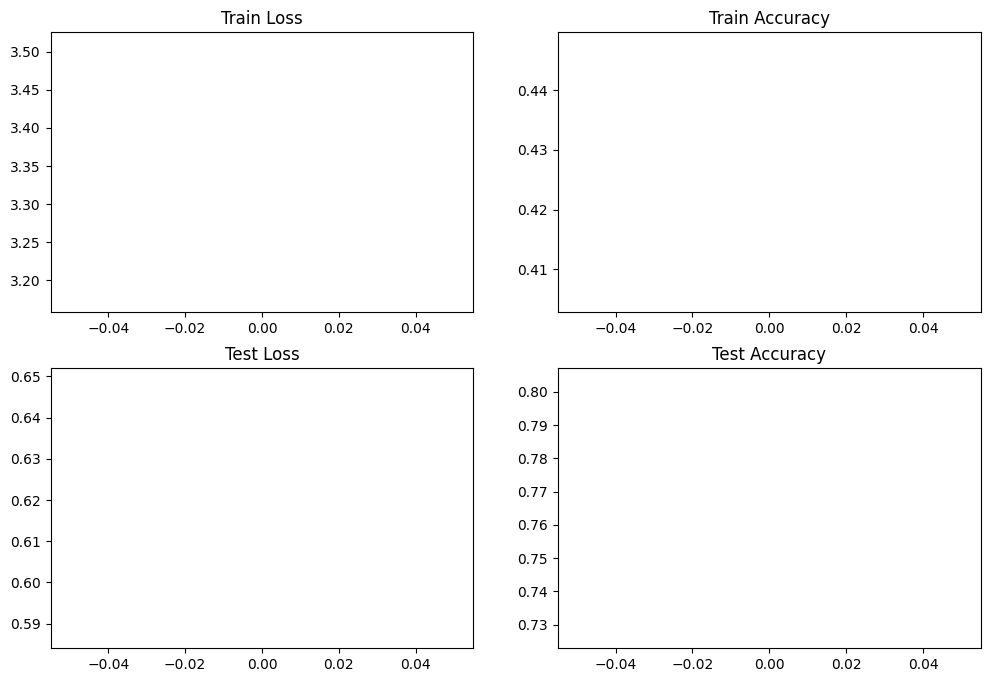

Epoch 2 - Layer 1 - Train Loss: 6.8347 - Train Acc: 0.0000
Epoch 2 - Layer 2 - Train Loss: 6.5695 - Train Acc: 0.0000
Epoch 2 - Layer 3 - Train Loss: 6.5537 - Train Acc: 0.0000
Epoch 2 - Layer 4 - Train Loss: 6.2461 - Train Acc: 0.2500
Epoch 2 - Layer 5 - Train Loss: 5.7213 - Train Acc: 10.2500
Epoch 2 - Layer 6 - Train Loss: 5.7475 - Train Acc: 10.1250
Epoch 2 - Layer 7 - Train Loss: 5.3499 - Train Acc: 40.2500
Epoch 2 - Layer 8 - Train Loss: 4.6833 - Train Acc: 48.3750
Epoch 2 - Layer 9 - Train Loss: 4.3087 - Train Acc: 53.2500
Epoch 2 - Layer 10 - Train Loss: 3.6629 - Train Acc: 57.3750
Epoch 2 - Layer 11 - Train Loss: 2.6042 - Train Acc: 62.2500
Epoch 2 - Layer 12 - Train Loss: 1.0974 - Train Acc: 69.8750
Epoch 2 - Train Loss: 0.6475 - Train Acc: 78.0000
Epoch 2 - Layer 1 - Test Loss: 6.7708 - Test Acc: 0.0000
Epoch 2 - Layer 2 - Test Loss: 6.5279 - Test Acc: 0.0000
Epoch 2 - Layer 3 - Test Loss: 6.4820 - Test Acc: 0.0000
Epoch 2 - Layer 4 - Test Loss: 6.1285 - Test Acc: 0.0000
Epo

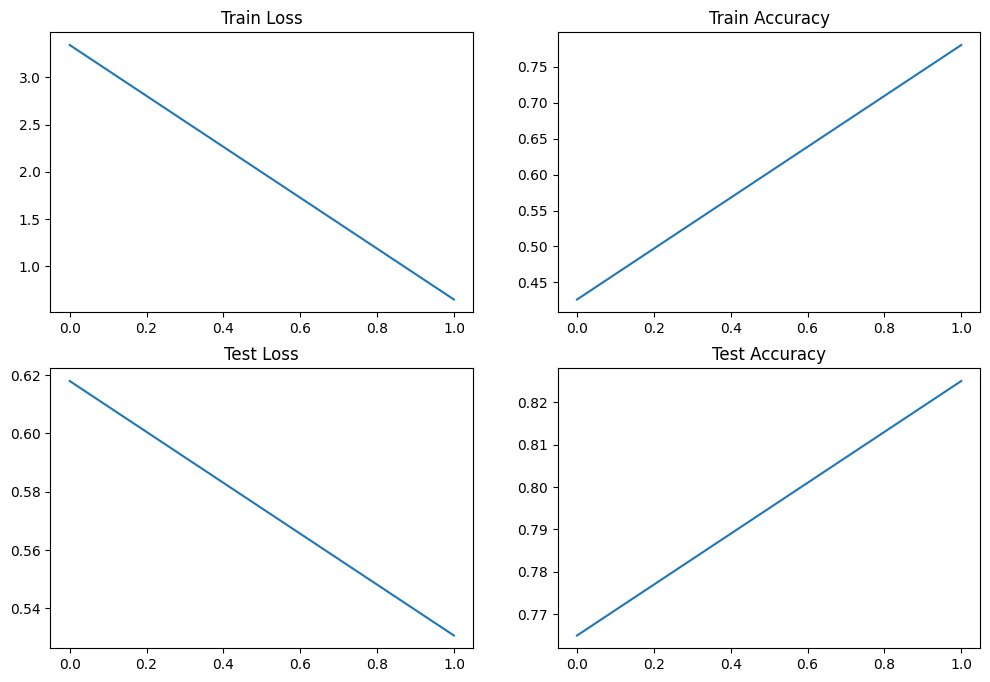

Epoch 3 - Layer 1 - Train Loss: 6.8338 - Train Acc: 0.0000
Epoch 3 - Layer 2 - Train Loss: 6.5558 - Train Acc: 0.0000
Epoch 3 - Layer 3 - Train Loss: 6.5286 - Train Acc: 0.0000
Epoch 3 - Layer 4 - Train Loss: 6.2131 - Train Acc: 0.5000
Epoch 3 - Layer 5 - Train Loss: 5.6888 - Train Acc: 16.0000
Epoch 3 - Layer 6 - Train Loss: 5.7008 - Train Acc: 16.3750
Epoch 3 - Layer 7 - Train Loss: 5.3051 - Train Acc: 43.7500
Epoch 3 - Layer 8 - Train Loss: 4.5342 - Train Acc: 51.7500
Epoch 3 - Layer 9 - Train Loss: 4.0095 - Train Acc: 58.5000
Epoch 3 - Layer 10 - Train Loss: 3.1318 - Train Acc: 65.8750
Epoch 3 - Layer 11 - Train Loss: 1.9945 - Train Acc: 74.0000
Epoch 3 - Layer 12 - Train Loss: 0.6805 - Train Acc: 84.6250
Epoch 3 - Train Loss: 0.2937 - Train Acc: 92.2500
Epoch 3 - Layer 1 - Test Loss: 6.7698 - Test Acc: 0.0000
Epoch 3 - Layer 2 - Test Loss: 6.5204 - Test Acc: 0.0000
Epoch 3 - Layer 3 - Test Loss: 6.4459 - Test Acc: 0.0000
Epoch 3 - Layer 4 - Test Loss: 6.1122 - Test Acc: 0.0000
Epo

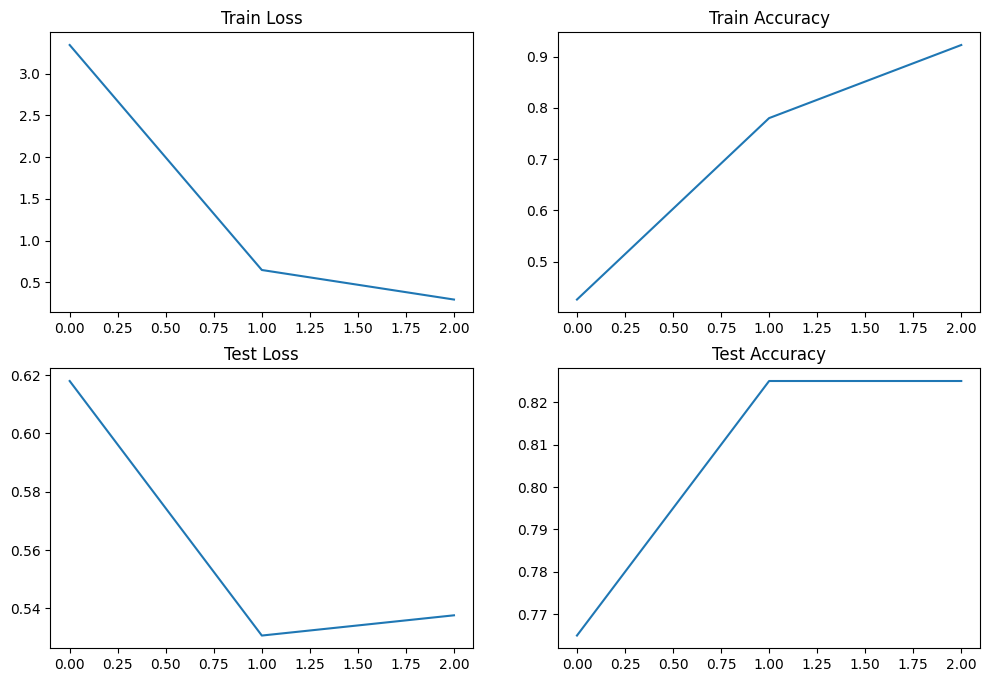

Epoch 4 - Layer 1 - Train Loss: 6.8357 - Train Acc: 0.0000
Epoch 4 - Layer 2 - Train Loss: 6.5548 - Train Acc: 0.0000
Epoch 4 - Layer 3 - Train Loss: 6.4985 - Train Acc: 0.0000
Epoch 4 - Layer 4 - Train Loss: 6.1829 - Train Acc: 0.3750
Epoch 4 - Layer 5 - Train Loss: 5.6204 - Train Acc: 17.0000
Epoch 4 - Layer 6 - Train Loss: 5.6440 - Train Acc: 17.8750
Epoch 4 - Layer 7 - Train Loss: 5.2156 - Train Acc: 45.8750
Epoch 4 - Layer 8 - Train Loss: 4.4473 - Train Acc: 50.2500
Epoch 4 - Layer 9 - Train Loss: 3.8945 - Train Acc: 57.6250
Epoch 4 - Layer 10 - Train Loss: 2.8940 - Train Acc: 68.1250
Epoch 4 - Layer 11 - Train Loss: 1.6252 - Train Acc: 81.5000
Epoch 4 - Layer 12 - Train Loss: 0.4295 - Train Acc: 90.1250
Epoch 4 - Train Loss: 0.1561 - Train Acc: 95.7500
Epoch 4 - Layer 1 - Test Loss: 6.7694 - Test Acc: 0.0000
Epoch 4 - Layer 2 - Test Loss: 6.5179 - Test Acc: 0.0000
Epoch 4 - Layer 3 - Test Loss: 6.4138 - Test Acc: 0.0000
Epoch 4 - Layer 4 - Test Loss: 6.0778 - Test Acc: 0.0000
Epo

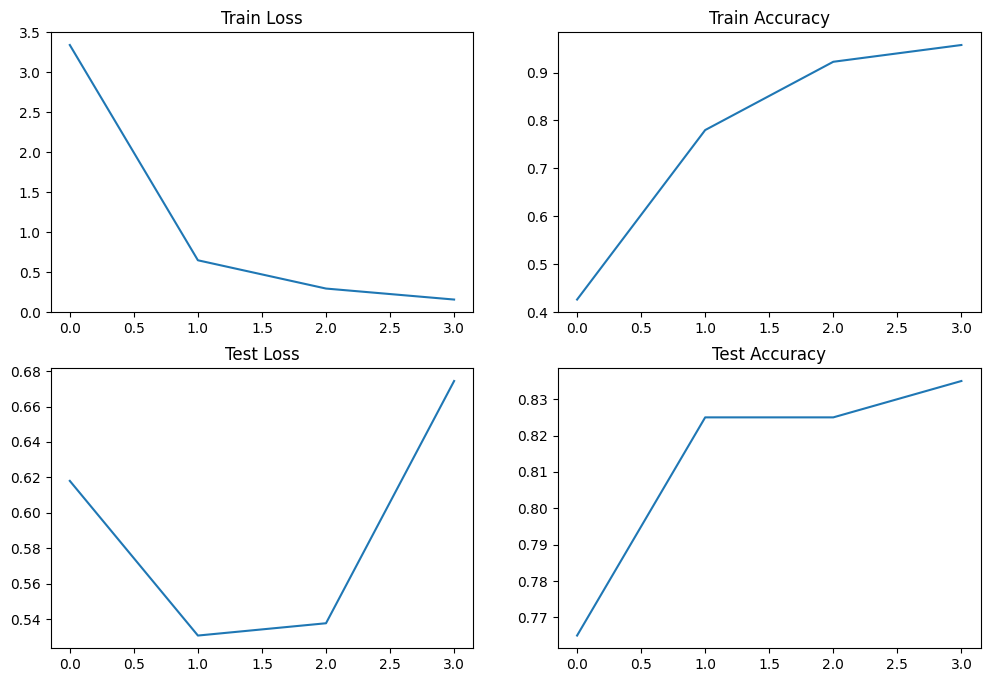

Epoch 5 - Layer 1 - Train Loss: 6.8364 - Train Acc: 0.0000
Epoch 5 - Layer 2 - Train Loss: 6.5547 - Train Acc: 0.0000
Epoch 5 - Layer 3 - Train Loss: 6.4875 - Train Acc: 0.0000
Epoch 5 - Layer 4 - Train Loss: 6.1583 - Train Acc: 0.6250
Epoch 5 - Layer 5 - Train Loss: 5.5720 - Train Acc: 15.6250
Epoch 5 - Layer 6 - Train Loss: 5.6155 - Train Acc: 20.6250
Epoch 5 - Layer 7 - Train Loss: 5.2005 - Train Acc: 44.0000
Epoch 5 - Layer 8 - Train Loss: 4.3936 - Train Acc: 51.2500
Epoch 5 - Layer 9 - Train Loss: 3.8343 - Train Acc: 61.1250
Epoch 5 - Layer 10 - Train Loss: 2.7954 - Train Acc: 69.0000
Epoch 5 - Layer 11 - Train Loss: 1.4620 - Train Acc: 86.3750
Epoch 5 - Layer 12 - Train Loss: 0.3928 - Train Acc: 91.0000
Epoch 5 - Train Loss: 0.1555 - Train Acc: 96.3750
Epoch 5 - Layer 1 - Test Loss: 6.7698 - Test Acc: 0.0000
Epoch 5 - Layer 2 - Test Loss: 6.5127 - Test Acc: 0.0000
Epoch 5 - Layer 3 - Test Loss: 6.4277 - Test Acc: 0.0000
Epoch 5 - Layer 4 - Test Loss: 6.0736 - Test Acc: 0.0000
Epo

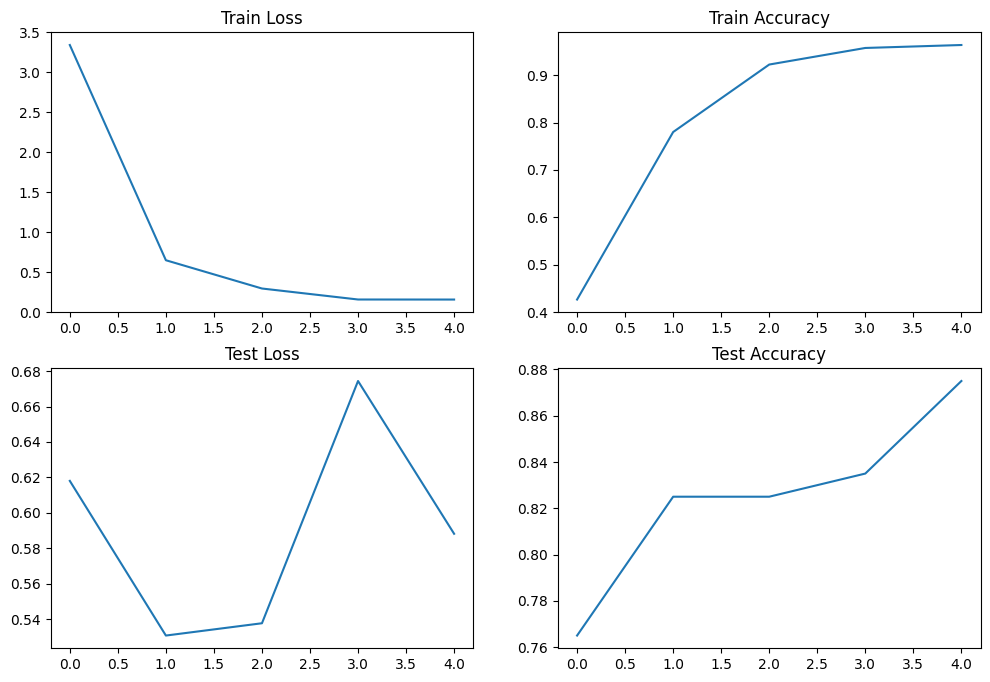

Epoch 6 - Layer 1 - Train Loss: 6.8362 - Train Acc: 0.0000
Epoch 6 - Layer 2 - Train Loss: 6.5504 - Train Acc: 0.0000
Epoch 6 - Layer 3 - Train Loss: 6.4924 - Train Acc: 0.0000
Epoch 6 - Layer 4 - Train Loss: 6.1600 - Train Acc: 1.7500
Epoch 6 - Layer 5 - Train Loss: 5.5395 - Train Acc: 19.1250
Epoch 6 - Layer 6 - Train Loss: 5.6035 - Train Acc: 20.3750
Epoch 6 - Layer 7 - Train Loss: 5.1928 - Train Acc: 45.1250
Epoch 6 - Layer 8 - Train Loss: 4.3419 - Train Acc: 50.8750
Epoch 6 - Layer 9 - Train Loss: 3.7854 - Train Acc: 61.5000
Epoch 6 - Layer 10 - Train Loss: 2.6966 - Train Acc: 70.6250
Epoch 6 - Layer 11 - Train Loss: 1.3336 - Train Acc: 84.6250
Epoch 6 - Layer 12 - Train Loss: 0.3149 - Train Acc: 91.3750
Epoch 6 - Train Loss: 0.1043 - Train Acc: 97.3750
Epoch 6 - Layer 1 - Test Loss: 6.7692 - Test Acc: 0.0000
Epoch 6 - Layer 2 - Test Loss: 6.5115 - Test Acc: 0.0000
Epoch 6 - Layer 3 - Test Loss: 6.4321 - Test Acc: 0.0000
Epoch 6 - Layer 4 - Test Loss: 6.0608 - Test Acc: 0.0000
Epo

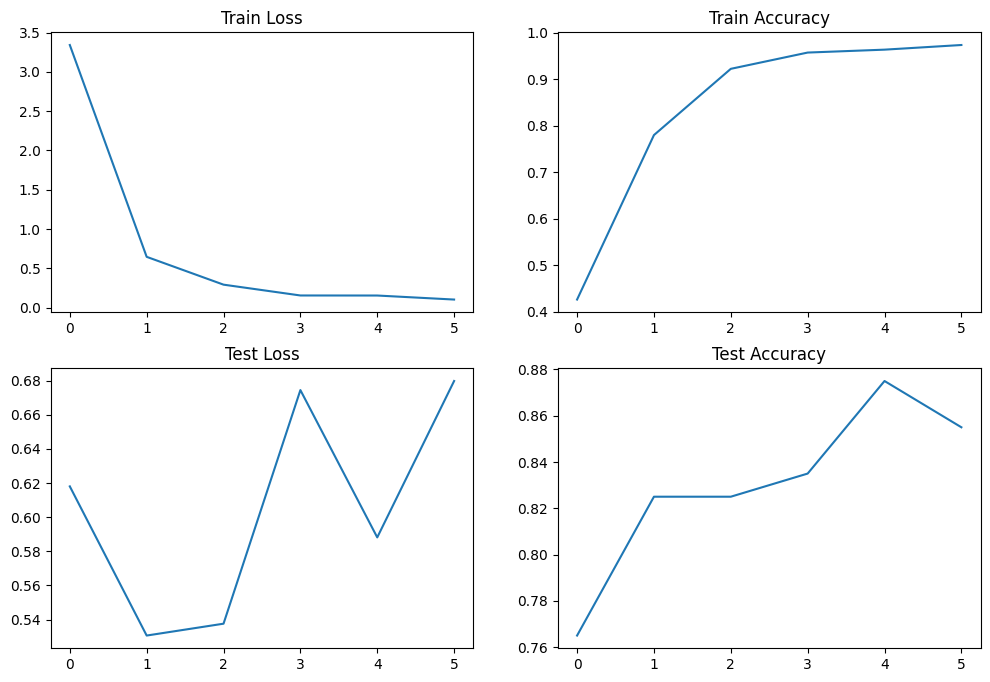

Epoch 7 - Layer 1 - Train Loss: 6.8339 - Train Acc: 0.0000
Epoch 7 - Layer 2 - Train Loss: 6.5528 - Train Acc: 0.0000
Epoch 7 - Layer 3 - Train Loss: 6.4890 - Train Acc: 0.0000
Epoch 7 - Layer 4 - Train Loss: 6.1516 - Train Acc: 1.0000
Epoch 7 - Layer 5 - Train Loss: 5.5309 - Train Acc: 19.7500
Epoch 7 - Layer 6 - Train Loss: 5.5852 - Train Acc: 19.3750
Epoch 7 - Layer 7 - Train Loss: 5.2080 - Train Acc: 43.6250
Epoch 7 - Layer 8 - Train Loss: 4.3188 - Train Acc: 51.7500
Epoch 7 - Layer 9 - Train Loss: 3.7629 - Train Acc: 62.8750
Epoch 7 - Layer 10 - Train Loss: 2.6252 - Train Acc: 75.8750
Epoch 7 - Layer 11 - Train Loss: 1.2226 - Train Acc: 88.5000
Epoch 7 - Layer 12 - Train Loss: 0.2626 - Train Acc: 94.0000
Epoch 7 - Train Loss: 0.0763 - Train Acc: 98.0000
Epoch 7 - Layer 1 - Test Loss: 6.7693 - Test Acc: 0.0000
Epoch 7 - Layer 2 - Test Loss: 6.5113 - Test Acc: 0.0000
Epoch 7 - Layer 3 - Test Loss: 6.4295 - Test Acc: 0.0000
Epoch 7 - Layer 4 - Test Loss: 6.0528 - Test Acc: 0.0000
Epo

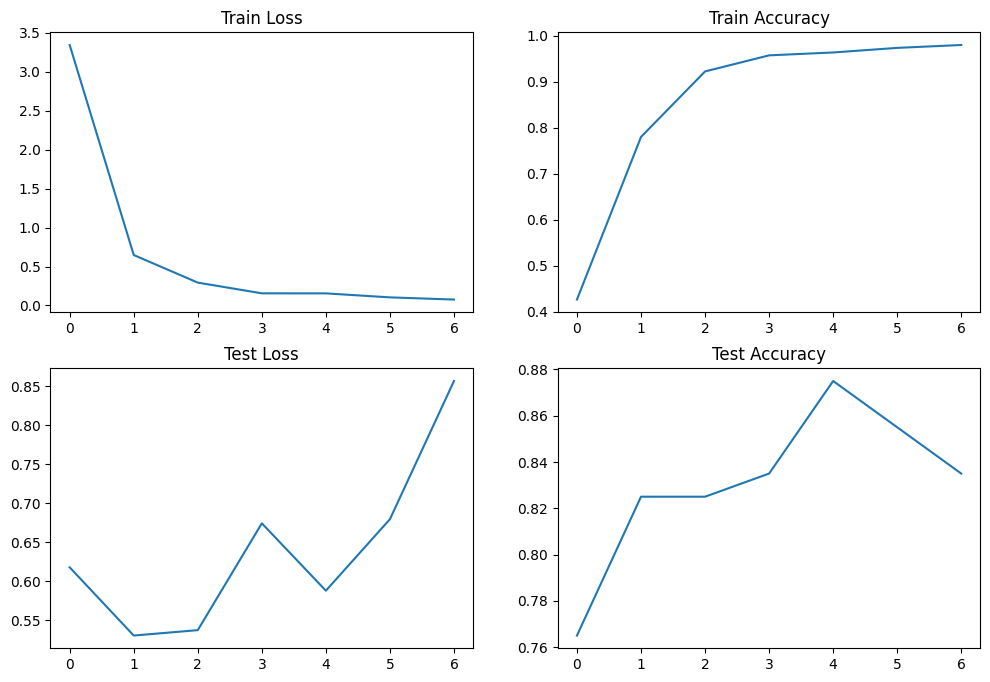

Epoch 8 - Layer 1 - Train Loss: 6.8324 - Train Acc: 0.0000
Epoch 8 - Layer 2 - Train Loss: 6.5380 - Train Acc: 0.0000
Epoch 8 - Layer 3 - Train Loss: 6.4809 - Train Acc: 0.0000
Epoch 8 - Layer 4 - Train Loss: 6.1378 - Train Acc: 1.3750
Epoch 8 - Layer 5 - Train Loss: 5.4815 - Train Acc: 21.1250
Epoch 8 - Layer 6 - Train Loss: 5.5402 - Train Acc: 24.0000
Epoch 8 - Layer 7 - Train Loss: 5.1551 - Train Acc: 45.6250
Epoch 8 - Layer 8 - Train Loss: 4.2476 - Train Acc: 52.0000
Epoch 8 - Layer 9 - Train Loss: 3.6412 - Train Acc: 63.6250
Epoch 8 - Layer 10 - Train Loss: 2.5152 - Train Acc: 73.5000
Epoch 8 - Layer 11 - Train Loss: 1.1773 - Train Acc: 87.5000
Epoch 8 - Layer 12 - Train Loss: 0.2239 - Train Acc: 95.3750
Epoch 8 - Train Loss: 0.0758 - Train Acc: 98.7500
Epoch 8 - Layer 1 - Test Loss: 6.7693 - Test Acc: 0.0000
Epoch 8 - Layer 2 - Test Loss: 6.5078 - Test Acc: 0.0000
Epoch 8 - Layer 3 - Test Loss: 6.4325 - Test Acc: 0.0000
Epoch 8 - Layer 4 - Test Loss: 6.0509 - Test Acc: 0.0000
Epo

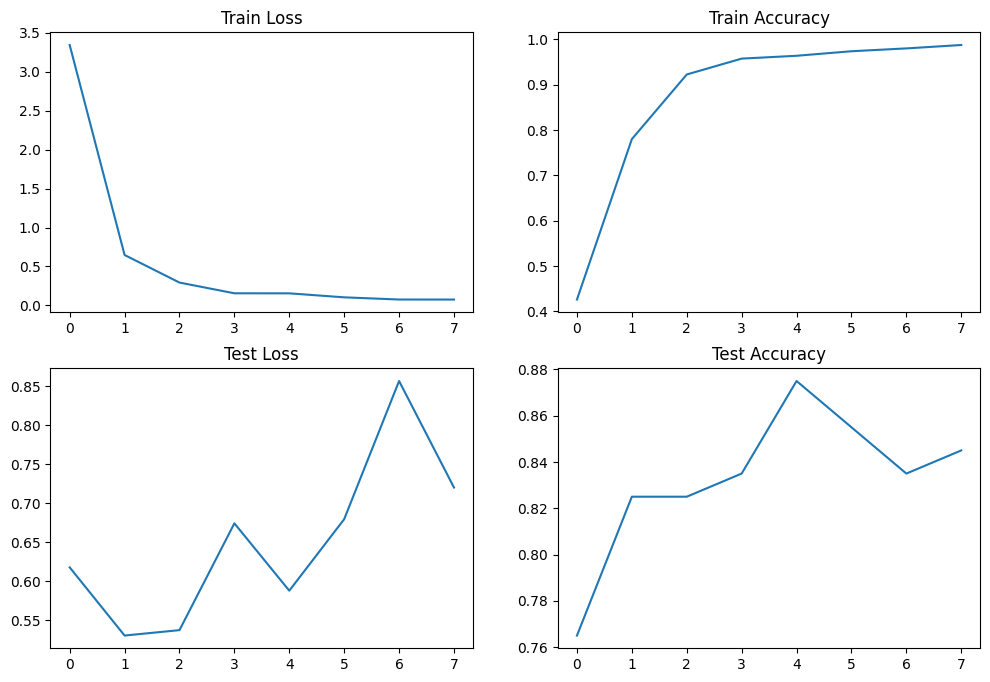

Epoch 9 - Layer 1 - Train Loss: 6.8347 - Train Acc: 0.0000
Epoch 9 - Layer 2 - Train Loss: 6.5409 - Train Acc: 0.0000
Epoch 9 - Layer 3 - Train Loss: 6.4919 - Train Acc: 0.0000
Epoch 9 - Layer 4 - Train Loss: 6.1331 - Train Acc: 1.8750
Epoch 9 - Layer 5 - Train Loss: 5.4840 - Train Acc: 22.0000
Epoch 9 - Layer 6 - Train Loss: 5.5427 - Train Acc: 22.7500
Epoch 9 - Layer 7 - Train Loss: 5.1627 - Train Acc: 45.5000
Epoch 9 - Layer 8 - Train Loss: 4.2214 - Train Acc: 51.6250
Epoch 9 - Layer 9 - Train Loss: 3.6335 - Train Acc: 61.7500
Epoch 9 - Layer 10 - Train Loss: 2.4907 - Train Acc: 74.1250
Epoch 9 - Layer 11 - Train Loss: 1.1197 - Train Acc: 88.0000
Epoch 9 - Layer 12 - Train Loss: 0.2114 - Train Acc: 94.7500
Epoch 9 - Train Loss: 0.0495 - Train Acc: 98.7500
Epoch 9 - Layer 1 - Test Loss: 6.7686 - Test Acc: 0.0000
Epoch 9 - Layer 2 - Test Loss: 6.5024 - Test Acc: 0.0000
Epoch 9 - Layer 3 - Test Loss: 6.4294 - Test Acc: 0.0000
Epoch 9 - Layer 4 - Test Loss: 6.0510 - Test Acc: 0.4464
Epo

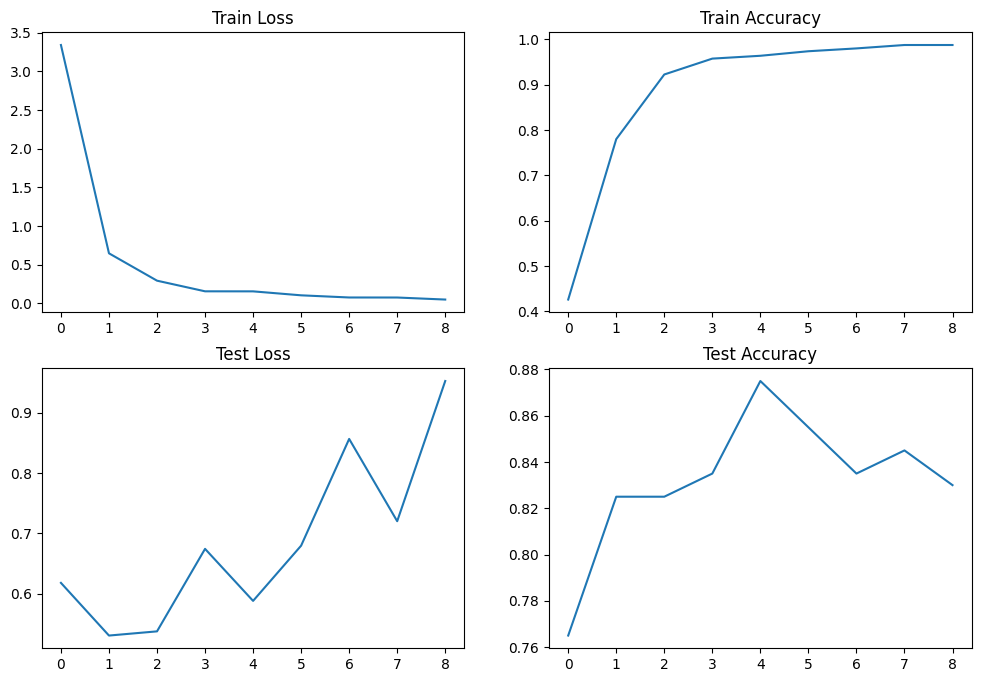

Epoch 10 - Layer 1 - Train Loss: 6.8287 - Train Acc: 0.0000
Epoch 10 - Layer 2 - Train Loss: 6.5259 - Train Acc: 0.0000
Epoch 10 - Layer 3 - Train Loss: 6.4683 - Train Acc: 0.0000
Epoch 10 - Layer 4 - Train Loss: 6.1185 - Train Acc: 2.2500
Epoch 10 - Layer 5 - Train Loss: 5.5309 - Train Acc: 20.3750
Epoch 10 - Layer 6 - Train Loss: 5.5837 - Train Acc: 22.3750
Epoch 10 - Layer 7 - Train Loss: 5.1670 - Train Acc: 45.5000
Epoch 10 - Layer 8 - Train Loss: 4.2548 - Train Acc: 52.3750
Epoch 10 - Layer 9 - Train Loss: 3.6786 - Train Acc: 69.7500
Epoch 10 - Layer 10 - Train Loss: 2.4649 - Train Acc: 77.8750
Epoch 10 - Layer 11 - Train Loss: 1.0708 - Train Acc: 91.5000
Epoch 10 - Layer 12 - Train Loss: 0.1886 - Train Acc: 96.1250
Epoch 10 - Train Loss: 0.0533 - Train Acc: 98.5000
Epoch 10 - Layer 1 - Test Loss: 6.7684 - Test Acc: 0.0000
Epoch 10 - Layer 2 - Test Loss: 6.4968 - Test Acc: 0.0000
Epoch 10 - Layer 3 - Test Loss: 6.4047 - Test Acc: 0.0000
Epoch 10 - Layer 4 - Test Loss: 6.0376 - Tes

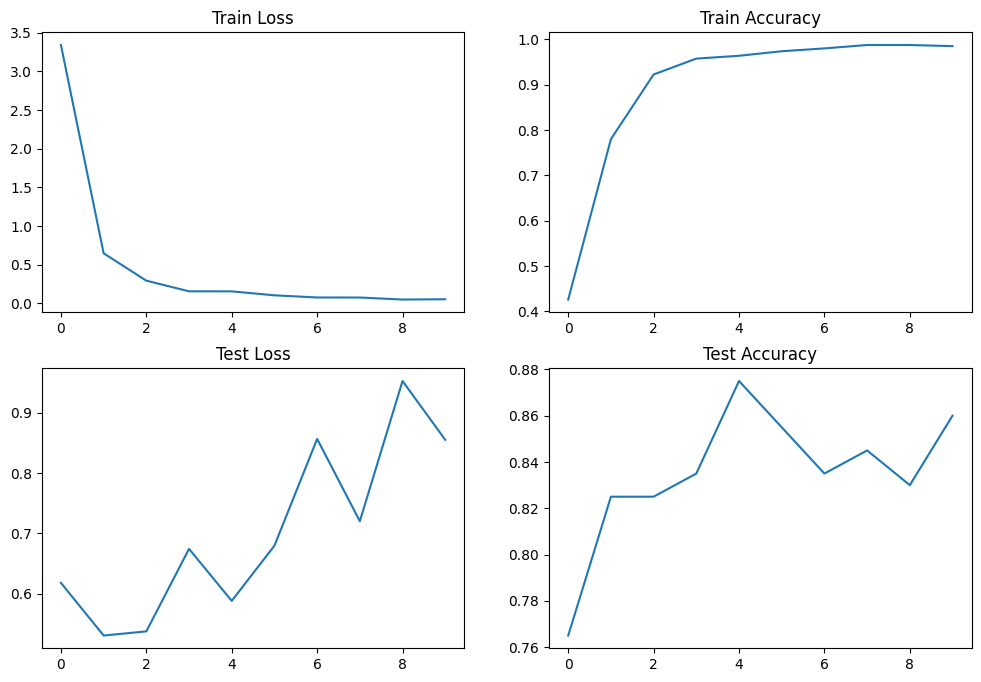

Epoch 11 - Layer 1 - Train Loss: 6.8356 - Train Acc: 0.0000
Epoch 11 - Layer 2 - Train Loss: 6.5323 - Train Acc: 0.0000
Epoch 11 - Layer 3 - Train Loss: 6.4616 - Train Acc: 0.1250
Epoch 11 - Layer 4 - Train Loss: 6.1210 - Train Acc: 2.3750
Epoch 11 - Layer 5 - Train Loss: 5.5408 - Train Acc: 18.8750
Epoch 11 - Layer 6 - Train Loss: 5.5849 - Train Acc: 22.6250
Epoch 11 - Layer 7 - Train Loss: 5.1614 - Train Acc: 46.1250
Epoch 11 - Layer 8 - Train Loss: 4.1915 - Train Acc: 51.3750
Epoch 11 - Layer 9 - Train Loss: 3.6150 - Train Acc: 65.8750
Epoch 11 - Layer 10 - Train Loss: 2.3754 - Train Acc: 78.3750
Epoch 11 - Layer 11 - Train Loss: 0.9680 - Train Acc: 90.8750
Epoch 11 - Layer 12 - Train Loss: 0.1784 - Train Acc: 95.8750
Epoch 11 - Train Loss: 0.0401 - Train Acc: 98.8750
Epoch 11 - Layer 1 - Test Loss: 6.7684 - Test Acc: 0.0000
Epoch 11 - Layer 2 - Test Loss: 6.4967 - Test Acc: 0.0000
Epoch 11 - Layer 3 - Test Loss: 6.3962 - Test Acc: 0.0000
Epoch 11 - Layer 4 - Test Loss: 6.0206 - Tes

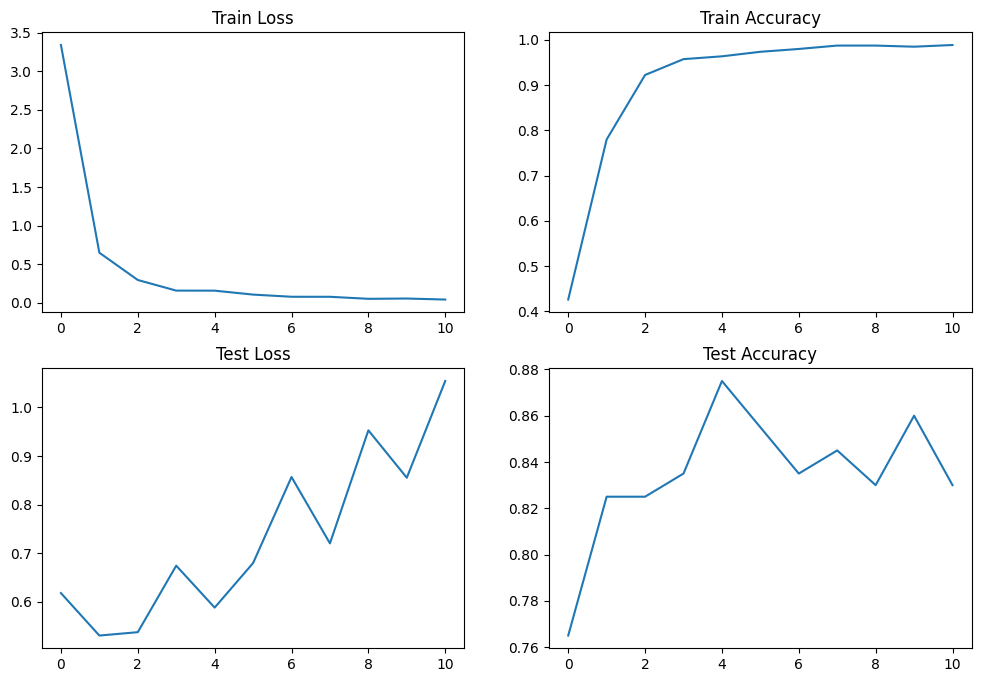

Epoch 12 - Layer 1 - Train Loss: 6.8260 - Train Acc: 0.0000
Epoch 12 - Layer 2 - Train Loss: 6.5243 - Train Acc: 0.0000
Epoch 12 - Layer 3 - Train Loss: 6.4572 - Train Acc: 0.0000
Epoch 12 - Layer 4 - Train Loss: 6.1154 - Train Acc: 2.7500
Epoch 12 - Layer 5 - Train Loss: 5.5386 - Train Acc: 19.2500
Epoch 12 - Layer 6 - Train Loss: 5.5766 - Train Acc: 24.1250
Epoch 12 - Layer 7 - Train Loss: 5.1759 - Train Acc: 46.0000
Epoch 12 - Layer 8 - Train Loss: 4.1703 - Train Acc: 53.0000
Epoch 12 - Layer 9 - Train Loss: 3.5604 - Train Acc: 63.3750
Epoch 12 - Layer 10 - Train Loss: 2.3304 - Train Acc: 76.5000
Epoch 12 - Layer 11 - Train Loss: 0.9594 - Train Acc: 90.2500
Epoch 12 - Layer 12 - Train Loss: 0.1555 - Train Acc: 97.5000
Epoch 12 - Train Loss: 0.0353 - Train Acc: 99.2500
Epoch 12 - Layer 1 - Test Loss: 6.7675 - Test Acc: 0.0000
Epoch 12 - Layer 2 - Test Loss: 6.4914 - Test Acc: 0.0000
Epoch 12 - Layer 3 - Test Loss: 6.4026 - Test Acc: 0.0000
Epoch 12 - Layer 4 - Test Loss: 6.0294 - Tes

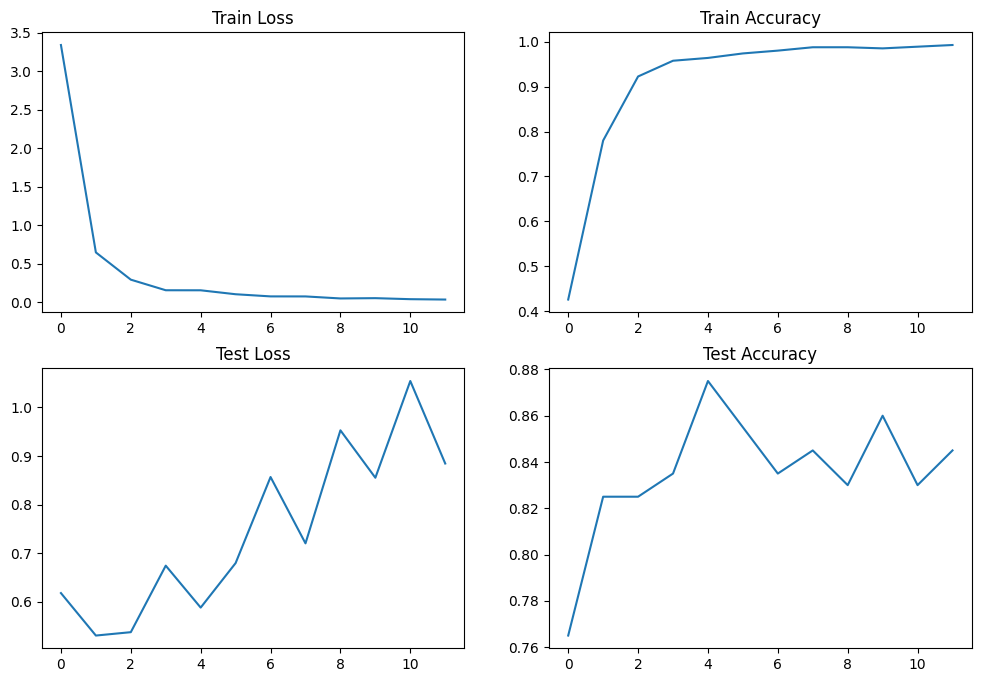

Epoch 13 - Layer 1 - Train Loss: 6.8323 - Train Acc: 0.0000
Epoch 13 - Layer 2 - Train Loss: 6.5209 - Train Acc: 0.0000
Epoch 13 - Layer 3 - Train Loss: 6.4592 - Train Acc: 0.0000
Epoch 13 - Layer 4 - Train Loss: 6.1146 - Train Acc: 2.0000
Epoch 13 - Layer 5 - Train Loss: 5.5211 - Train Acc: 20.2500
Epoch 13 - Layer 6 - Train Loss: 5.5577 - Train Acc: 25.8750
Epoch 13 - Layer 7 - Train Loss: 5.1762 - Train Acc: 44.7500
Epoch 13 - Layer 8 - Train Loss: 4.1524 - Train Acc: 52.6250
Epoch 13 - Layer 9 - Train Loss: 3.5448 - Train Acc: 62.5000
Epoch 13 - Layer 10 - Train Loss: 2.2967 - Train Acc: 77.6250
Epoch 13 - Layer 11 - Train Loss: 0.9216 - Train Acc: 92.5000
Epoch 13 - Layer 12 - Train Loss: 0.1210 - Train Acc: 97.7500
Epoch 13 - Train Loss: 0.0333 - Train Acc: 98.7500
Epoch 13 - Layer 1 - Test Loss: 6.7675 - Test Acc: 0.0000
Epoch 13 - Layer 2 - Test Loss: 6.4901 - Test Acc: 0.0000
Epoch 13 - Layer 3 - Test Loss: 6.3973 - Test Acc: 0.0000
Epoch 13 - Layer 4 - Test Loss: 6.0293 - Tes

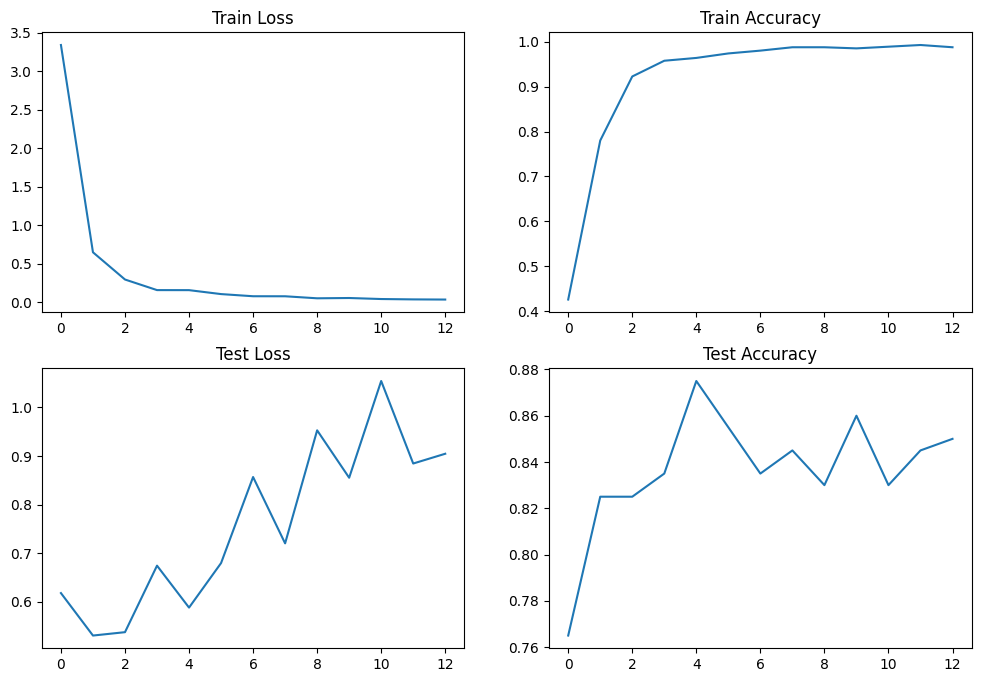

Epoch 14 - Layer 1 - Train Loss: 6.8314 - Train Acc: 0.0000
Epoch 14 - Layer 2 - Train Loss: 6.5262 - Train Acc: 0.0000
Epoch 14 - Layer 3 - Train Loss: 6.4560 - Train Acc: 0.0000
Epoch 14 - Layer 4 - Train Loss: 6.1229 - Train Acc: 2.5000
Epoch 14 - Layer 5 - Train Loss: 5.4984 - Train Acc: 22.2500
Epoch 14 - Layer 6 - Train Loss: 5.5279 - Train Acc: 26.8750
Epoch 14 - Layer 7 - Train Loss: 5.1174 - Train Acc: 46.2500
Epoch 14 - Layer 8 - Train Loss: 4.1127 - Train Acc: 52.3750
Epoch 14 - Layer 9 - Train Loss: 3.5282 - Train Acc: 64.7500
Epoch 14 - Layer 10 - Train Loss: 2.2357 - Train Acc: 77.7500
Epoch 14 - Layer 11 - Train Loss: 0.8820 - Train Acc: 92.0000
Epoch 14 - Layer 12 - Train Loss: 0.1128 - Train Acc: 97.8750
Epoch 14 - Train Loss: 0.0207 - Train Acc: 99.6250
Epoch 14 - Layer 1 - Test Loss: 6.7676 - Test Acc: 0.0000
Epoch 14 - Layer 2 - Test Loss: 6.4918 - Test Acc: 0.0000
Epoch 14 - Layer 3 - Test Loss: 6.3970 - Test Acc: 0.0000
Epoch 14 - Layer 4 - Test Loss: 6.0237 - Tes

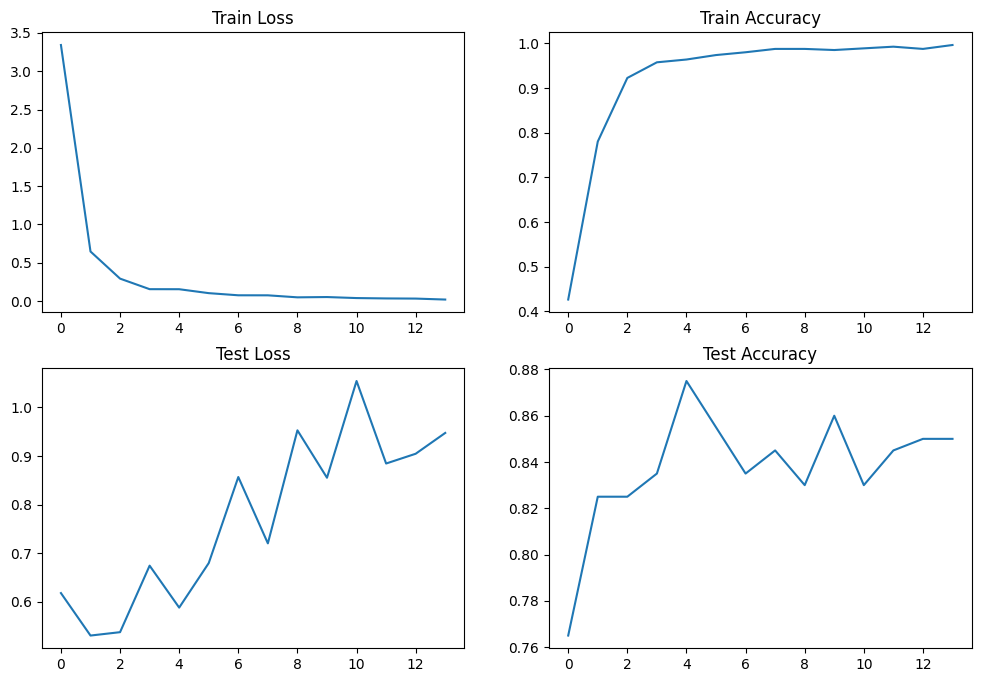

Epoch 15 - Layer 1 - Train Loss: 6.8328 - Train Acc: 0.0000
Epoch 15 - Layer 2 - Train Loss: 6.5291 - Train Acc: 0.0000
Epoch 15 - Layer 3 - Train Loss: 6.4630 - Train Acc: 0.0000
Epoch 15 - Layer 4 - Train Loss: 6.1161 - Train Acc: 2.0000
Epoch 15 - Layer 5 - Train Loss: 5.4758 - Train Acc: 21.7500
Epoch 15 - Layer 6 - Train Loss: 5.5098 - Train Acc: 26.8750
Epoch 15 - Layer 7 - Train Loss: 5.0939 - Train Acc: 47.1250
Epoch 15 - Layer 8 - Train Loss: 4.0373 - Train Acc: 52.7500
Epoch 15 - Layer 9 - Train Loss: 3.4265 - Train Acc: 65.1250
Epoch 15 - Layer 10 - Train Loss: 2.1319 - Train Acc: 80.8750
Epoch 15 - Layer 11 - Train Loss: 0.8025 - Train Acc: 92.3750
Epoch 15 - Layer 12 - Train Loss: 0.0971 - Train Acc: 98.7500
Epoch 15 - Train Loss: 0.0221 - Train Acc: 99.2500
Epoch 15 - Layer 1 - Test Loss: 6.7672 - Test Acc: 0.0000
Epoch 15 - Layer 2 - Test Loss: 6.4904 - Test Acc: 0.0000
Epoch 15 - Layer 3 - Test Loss: 6.3981 - Test Acc: 0.0000
Epoch 15 - Layer 4 - Test Loss: 6.0215 - Tes

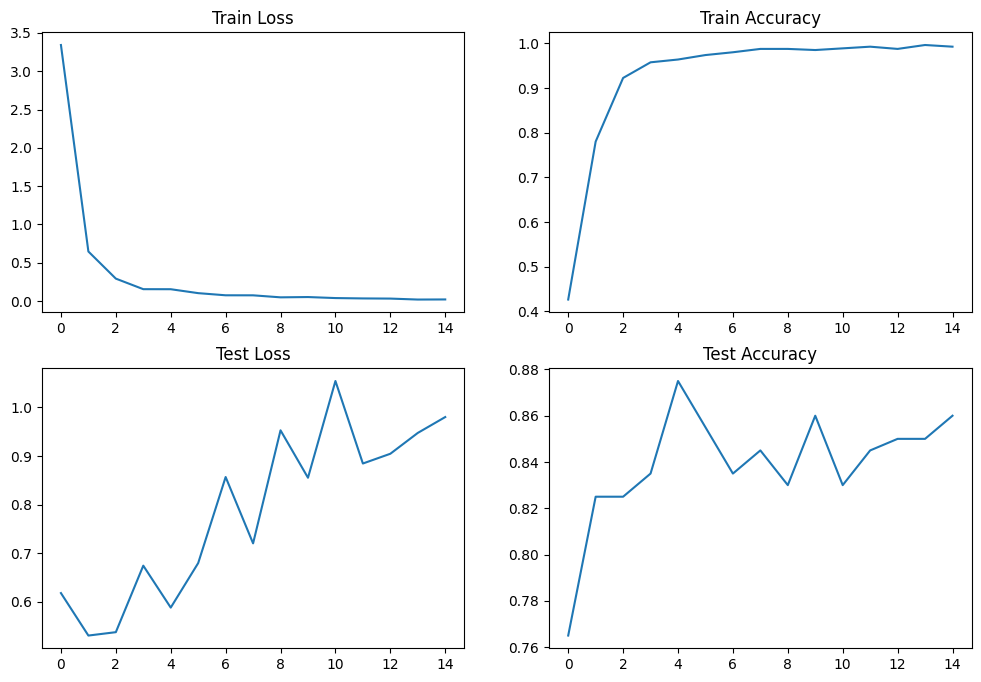

Epoch 16 - Layer 1 - Train Loss: 6.8337 - Train Acc: 0.0000
Epoch 16 - Layer 2 - Train Loss: 6.5268 - Train Acc: 0.0000
Epoch 16 - Layer 3 - Train Loss: 6.4542 - Train Acc: 0.0000
Epoch 16 - Layer 4 - Train Loss: 6.1084 - Train Acc: 3.1250
Epoch 16 - Layer 5 - Train Loss: 5.4773 - Train Acc: 21.1250
Epoch 16 - Layer 6 - Train Loss: 5.5046 - Train Acc: 26.5000
Epoch 16 - Layer 7 - Train Loss: 5.1171 - Train Acc: 46.2500
Epoch 16 - Layer 8 - Train Loss: 4.0747 - Train Acc: 52.3750
Epoch 16 - Layer 9 - Train Loss: 3.4585 - Train Acc: 62.5000
Epoch 16 - Layer 10 - Train Loss: 2.1577 - Train Acc: 78.2500
Epoch 16 - Layer 11 - Train Loss: 0.8208 - Train Acc: 92.6250
Epoch 16 - Layer 12 - Train Loss: 0.0969 - Train Acc: 98.1250
Epoch 16 - Train Loss: 0.0277 - Train Acc: 99.2500
Epoch 16 - Layer 1 - Test Loss: 6.7673 - Test Acc: 0.0000
Epoch 16 - Layer 2 - Test Loss: 6.4931 - Test Acc: 0.0000
Epoch 16 - Layer 3 - Test Loss: 6.3944 - Test Acc: 0.0000
Epoch 16 - Layer 4 - Test Loss: 6.0029 - Tes

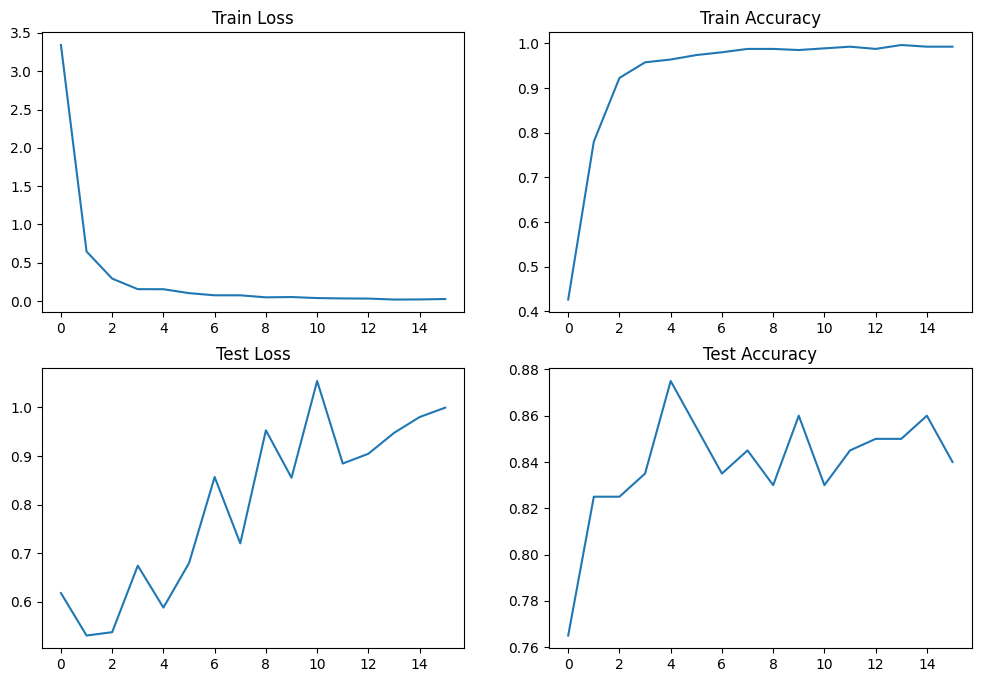

Epoch 17 - Layer 1 - Train Loss: 6.8282 - Train Acc: 0.0000
Epoch 17 - Layer 2 - Train Loss: 6.5271 - Train Acc: 0.0000
Epoch 17 - Layer 3 - Train Loss: 6.4514 - Train Acc: 0.0000
Epoch 17 - Layer 4 - Train Loss: 6.0928 - Train Acc: 3.0000
Epoch 17 - Layer 5 - Train Loss: 5.4468 - Train Acc: 23.3750
Epoch 17 - Layer 6 - Train Loss: 5.4797 - Train Acc: 29.2500
Epoch 17 - Layer 7 - Train Loss: 5.0868 - Train Acc: 47.1250
Epoch 17 - Layer 8 - Train Loss: 4.0350 - Train Acc: 52.0000
Epoch 17 - Layer 9 - Train Loss: 3.3861 - Train Acc: 66.2500
Epoch 17 - Layer 10 - Train Loss: 2.0941 - Train Acc: 78.3750
Epoch 17 - Layer 11 - Train Loss: 0.7449 - Train Acc: 94.6250
Epoch 17 - Layer 12 - Train Loss: 0.1151 - Train Acc: 97.7500
Epoch 17 - Train Loss: 0.0209 - Train Acc: 99.3750
Epoch 17 - Layer 1 - Test Loss: 6.7672 - Test Acc: 0.0000
Epoch 17 - Layer 2 - Test Loss: 6.4932 - Test Acc: 0.0000
Epoch 17 - Layer 3 - Test Loss: 6.3926 - Test Acc: 0.0000
Epoch 17 - Layer 4 - Test Loss: 5.9977 - Tes

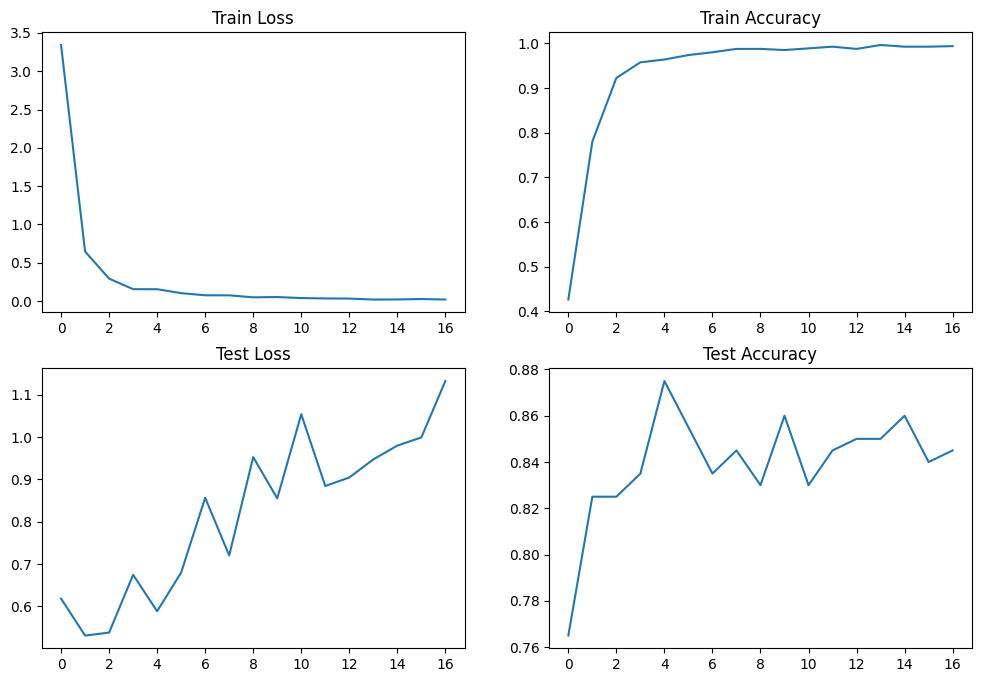

Epoch 18 - Layer 1 - Train Loss: 6.8293 - Train Acc: 0.0000
Epoch 18 - Layer 2 - Train Loss: 6.5296 - Train Acc: 0.0000
Epoch 18 - Layer 3 - Train Loss: 6.4587 - Train Acc: 0.0000
Epoch 18 - Layer 4 - Train Loss: 6.1077 - Train Acc: 2.0000
Epoch 18 - Layer 5 - Train Loss: 5.4467 - Train Acc: 20.8750
Epoch 18 - Layer 6 - Train Loss: 5.4790 - Train Acc: 28.8750
Epoch 18 - Layer 7 - Train Loss: 5.0970 - Train Acc: 46.2500
Epoch 18 - Layer 8 - Train Loss: 4.0061 - Train Acc: 54.0000
Epoch 18 - Layer 9 - Train Loss: 3.3668 - Train Acc: 67.8750
Epoch 18 - Layer 10 - Train Loss: 2.0285 - Train Acc: 79.5000
Epoch 18 - Layer 11 - Train Loss: 0.7106 - Train Acc: 94.3750
Epoch 18 - Layer 12 - Train Loss: 0.1019 - Train Acc: 98.0000
Epoch 18 - Train Loss: 0.0210 - Train Acc: 99.2500
Epoch 18 - Layer 1 - Test Loss: 6.7672 - Test Acc: 0.0000
Epoch 18 - Layer 2 - Test Loss: 6.4922 - Test Acc: 0.0000
Epoch 18 - Layer 3 - Test Loss: 6.3928 - Test Acc: 0.0000
Epoch 18 - Layer 4 - Test Loss: 5.9933 - Tes

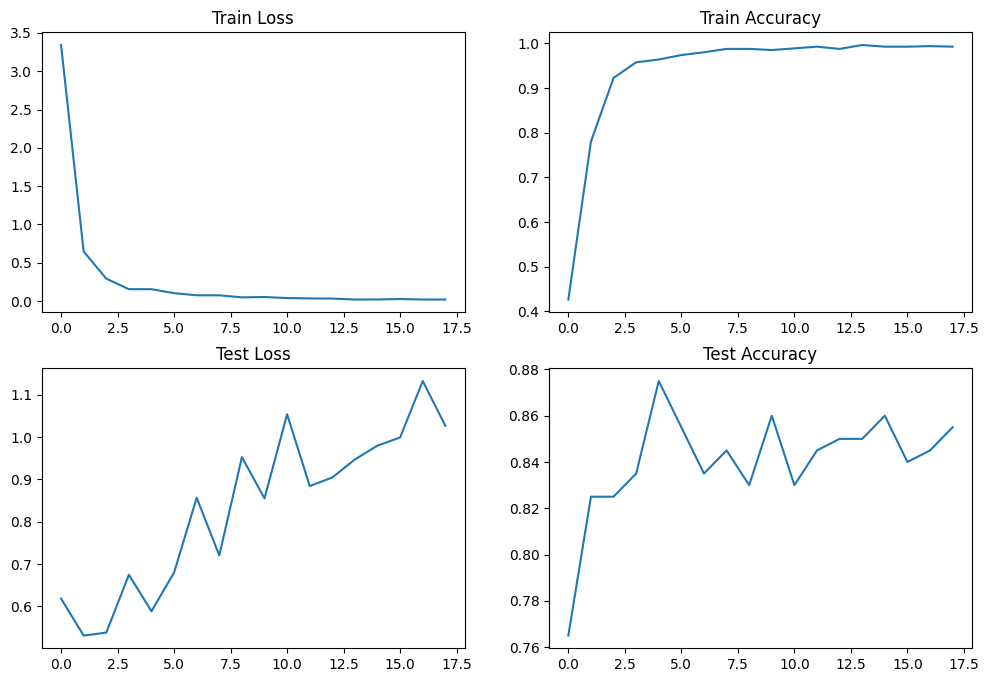

Epoch 19 - Layer 1 - Train Loss: 6.8269 - Train Acc: 0.0000
Epoch 19 - Layer 2 - Train Loss: 6.5257 - Train Acc: 0.0000
Epoch 19 - Layer 3 - Train Loss: 6.4543 - Train Acc: 0.0000
Epoch 19 - Layer 4 - Train Loss: 6.0882 - Train Acc: 3.0000
Epoch 19 - Layer 5 - Train Loss: 5.4253 - Train Acc: 22.8750
Epoch 19 - Layer 6 - Train Loss: 5.4648 - Train Acc: 28.2500
Epoch 19 - Layer 7 - Train Loss: 5.0574 - Train Acc: 47.2500
Epoch 19 - Layer 8 - Train Loss: 3.9609 - Train Acc: 52.1250
Epoch 19 - Layer 9 - Train Loss: 3.3137 - Train Acc: 62.3750
Epoch 19 - Layer 10 - Train Loss: 2.0326 - Train Acc: 74.3750
Epoch 19 - Layer 11 - Train Loss: 0.7609 - Train Acc: 90.5000
Epoch 19 - Layer 12 - Train Loss: 0.0819 - Train Acc: 99.0000
Epoch 19 - Train Loss: 0.0233 - Train Acc: 99.3750
Epoch 19 - Layer 1 - Test Loss: 6.7672 - Test Acc: 0.0000
Epoch 19 - Layer 2 - Test Loss: 6.4928 - Test Acc: 0.0000
Epoch 19 - Layer 3 - Test Loss: 6.3876 - Test Acc: 0.0000
Epoch 19 - Layer 4 - Test Loss: 5.9839 - Tes

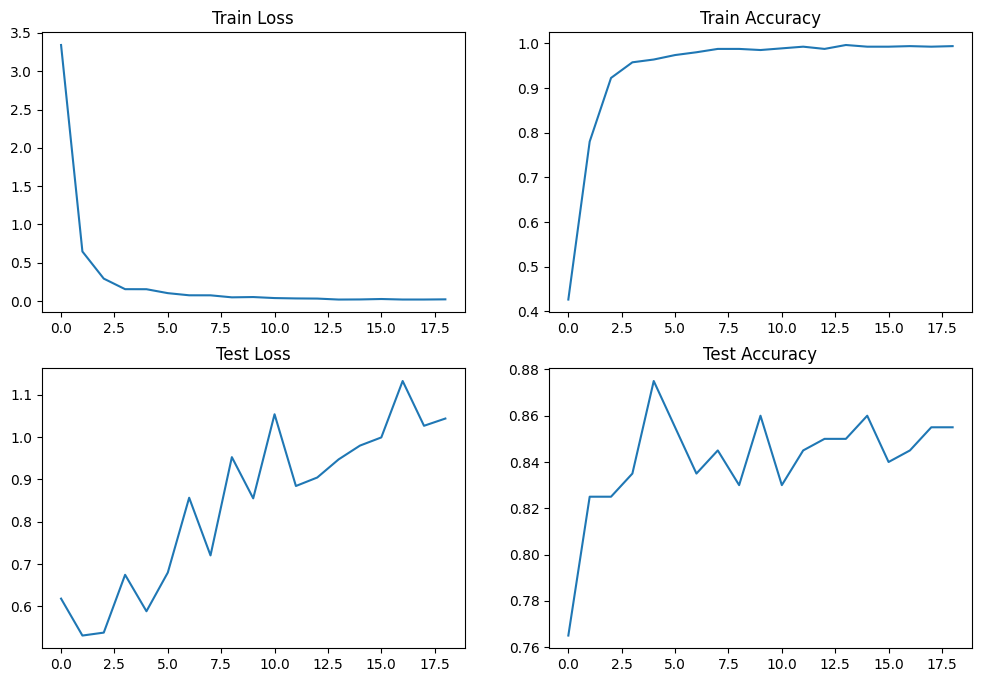

Epoch 20 - Layer 1 - Train Loss: 6.8356 - Train Acc: 0.0000
Epoch 20 - Layer 2 - Train Loss: 6.5271 - Train Acc: 0.0000
Epoch 20 - Layer 3 - Train Loss: 6.4489 - Train Acc: 0.0000
Epoch 20 - Layer 4 - Train Loss: 6.0763 - Train Acc: 3.5000
Epoch 20 - Layer 5 - Train Loss: 5.4326 - Train Acc: 24.6250
Epoch 20 - Layer 6 - Train Loss: 5.4759 - Train Acc: 28.0000
Epoch 20 - Layer 7 - Train Loss: 5.0771 - Train Acc: 46.7500
Epoch 20 - Layer 8 - Train Loss: 3.9530 - Train Acc: 53.3750
Epoch 20 - Layer 9 - Train Loss: 3.3406 - Train Acc: 63.0000
Epoch 20 - Layer 10 - Train Loss: 2.0015 - Train Acc: 78.1250
Epoch 20 - Layer 11 - Train Loss: 0.7303 - Train Acc: 92.8750
Epoch 20 - Layer 12 - Train Loss: 0.1139 - Train Acc: 97.2500
Epoch 20 - Train Loss: 0.0230 - Train Acc: 99.1250
Epoch 20 - Layer 1 - Test Loss: 6.7670 - Test Acc: 0.0000
Epoch 20 - Layer 2 - Test Loss: 6.4923 - Test Acc: 0.0000
Epoch 20 - Layer 3 - Test Loss: 6.3824 - Test Acc: 0.0000
Epoch 20 - Layer 4 - Test Loss: 5.9728 - Tes

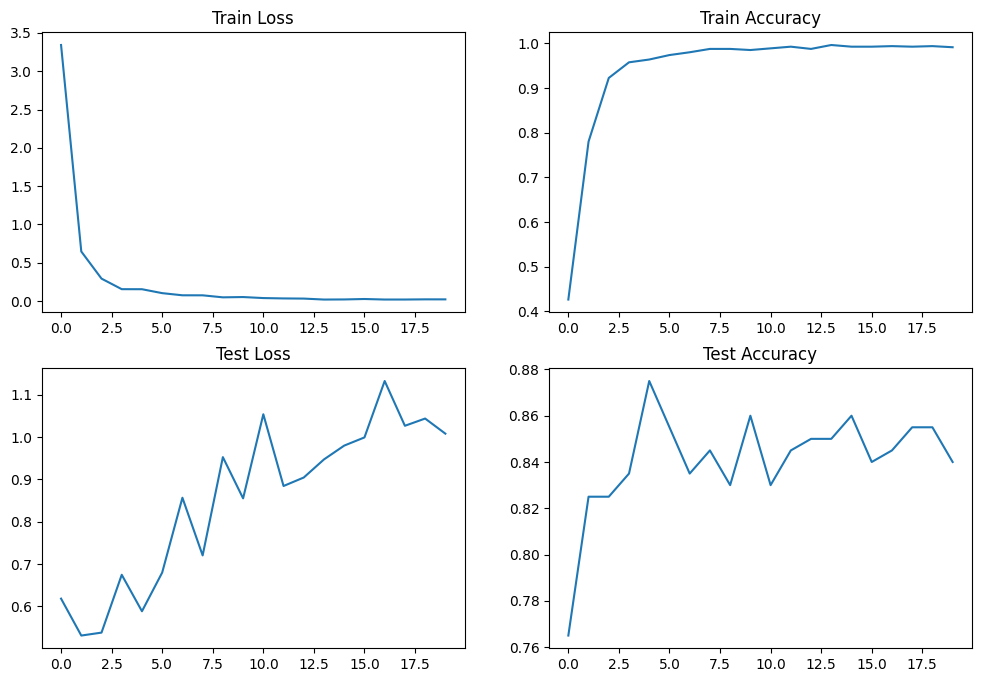

Epoch 21 - Layer 1 - Train Loss: 6.8345 - Train Acc: 0.0000
Epoch 21 - Layer 2 - Train Loss: 6.5235 - Train Acc: 0.0000
Epoch 21 - Layer 3 - Train Loss: 6.4447 - Train Acc: 0.0000
Epoch 21 - Layer 4 - Train Loss: 6.0603 - Train Acc: 2.8750
Epoch 21 - Layer 5 - Train Loss: 5.4214 - Train Acc: 24.2500
Epoch 21 - Layer 6 - Train Loss: 5.4697 - Train Acc: 29.3750
Epoch 21 - Layer 7 - Train Loss: 5.0628 - Train Acc: 46.8750
Epoch 21 - Layer 8 - Train Loss: 3.9455 - Train Acc: 53.2500
Epoch 21 - Layer 9 - Train Loss: 3.3236 - Train Acc: 62.5000
Epoch 21 - Layer 10 - Train Loss: 1.9749 - Train Acc: 79.7500
Epoch 21 - Layer 11 - Train Loss: 0.6747 - Train Acc: 93.5000
Epoch 21 - Layer 12 - Train Loss: 0.0967 - Train Acc: 98.2500
Epoch 21 - Train Loss: 0.0215 - Train Acc: 99.3750
Epoch 21 - Layer 1 - Test Loss: 6.7667 - Test Acc: 0.0000
Epoch 21 - Layer 2 - Test Loss: 6.4908 - Test Acc: 0.0000
Epoch 21 - Layer 3 - Test Loss: 6.3757 - Test Acc: 0.0000
Epoch 21 - Layer 4 - Test Loss: 5.9615 - Tes

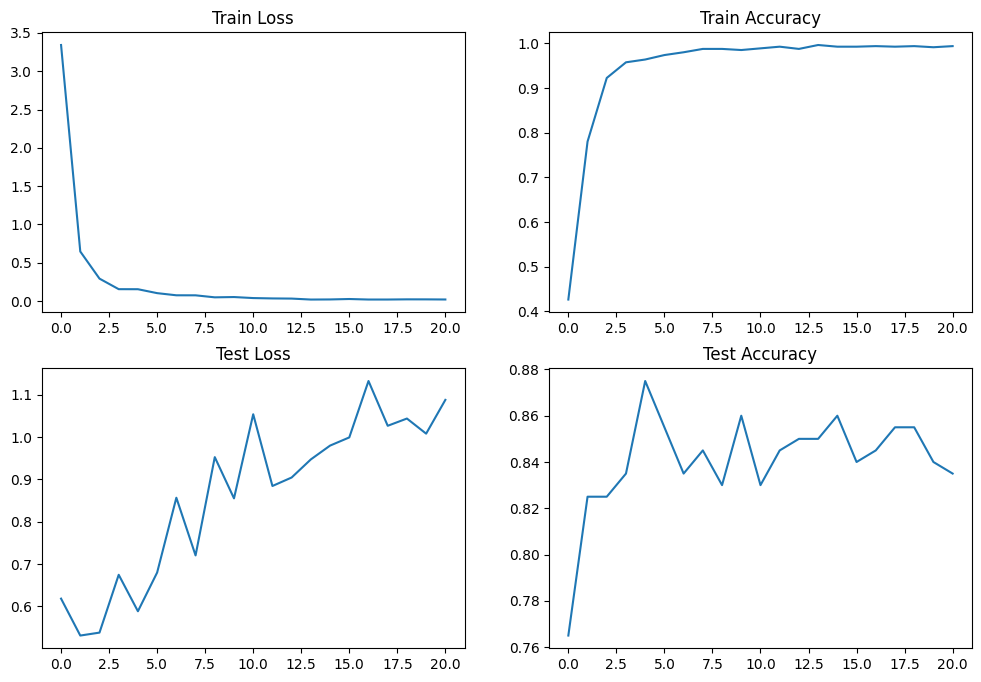

Epoch 22 - Layer 1 - Train Loss: 6.8298 - Train Acc: 0.0000
Epoch 22 - Layer 2 - Train Loss: 6.5156 - Train Acc: 0.0000
Epoch 22 - Layer 3 - Train Loss: 6.4271 - Train Acc: 0.1250
Epoch 22 - Layer 4 - Train Loss: 6.1070 - Train Acc: 4.3750
Epoch 22 - Layer 5 - Train Loss: 5.5147 - Train Acc: 21.1250
Epoch 22 - Layer 6 - Train Loss: 5.5197 - Train Acc: 26.8750
Epoch 22 - Layer 7 - Train Loss: 5.1429 - Train Acc: 46.2500
Epoch 22 - Layer 8 - Train Loss: 4.0450 - Train Acc: 54.3750
Epoch 22 - Layer 9 - Train Loss: 3.4358 - Train Acc: 63.5000
Epoch 22 - Layer 10 - Train Loss: 2.0861 - Train Acc: 77.3750
Epoch 22 - Layer 11 - Train Loss: 0.7382 - Train Acc: 91.3750
Epoch 22 - Layer 12 - Train Loss: 0.1235 - Train Acc: 96.3750
Epoch 22 - Train Loss: 0.0450 - Train Acc: 98.7500
Epoch 22 - Layer 1 - Test Loss: 6.7653 - Test Acc: 0.0000
Epoch 22 - Layer 2 - Test Loss: 6.4794 - Test Acc: 0.0000
Epoch 22 - Layer 3 - Test Loss: 6.3573 - Test Acc: 0.0000
Epoch 22 - Layer 4 - Test Loss: 6.0284 - Tes

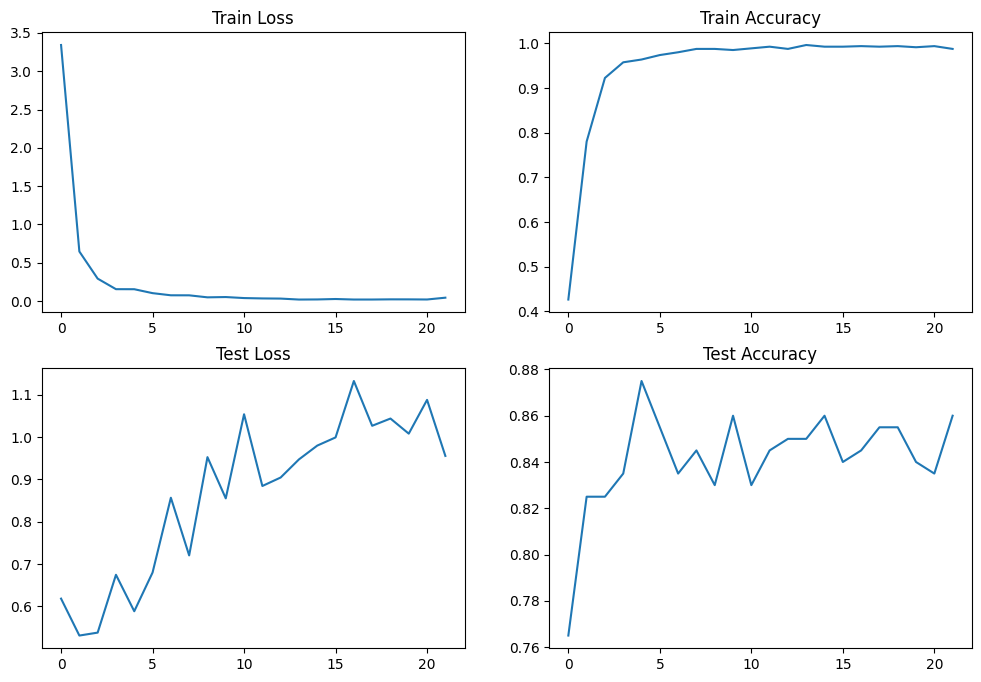

Epoch 23 - Layer 1 - Train Loss: 6.8301 - Train Acc: 0.0000
Epoch 23 - Layer 2 - Train Loss: 6.5066 - Train Acc: 0.0000
Epoch 23 - Layer 3 - Train Loss: 6.4148 - Train Acc: 0.0000
Epoch 23 - Layer 4 - Train Loss: 6.1348 - Train Acc: 5.3750
Epoch 23 - Layer 5 - Train Loss: 5.6161 - Train Acc: 17.3750
Epoch 23 - Layer 6 - Train Loss: 5.6054 - Train Acc: 22.6250
Epoch 23 - Layer 7 - Train Loss: 5.2274 - Train Acc: 46.2500
Epoch 23 - Layer 8 - Train Loss: 4.1475 - Train Acc: 51.5000
Epoch 23 - Layer 9 - Train Loss: 3.5350 - Train Acc: 60.0000
Epoch 23 - Layer 10 - Train Loss: 2.3247 - Train Acc: 74.7500
Epoch 23 - Layer 11 - Train Loss: 0.8027 - Train Acc: 91.3750
Epoch 23 - Layer 12 - Train Loss: 0.1401 - Train Acc: 97.0000
Epoch 23 - Train Loss: 0.0575 - Train Acc: 98.3750
Epoch 23 - Layer 1 - Test Loss: 6.7641 - Test Acc: 0.0000
Epoch 23 - Layer 2 - Test Loss: 6.4670 - Test Acc: 0.0000
Epoch 23 - Layer 3 - Test Loss: 6.3349 - Test Acc: 0.0000
Epoch 23 - Layer 4 - Test Loss: 6.0563 - Tes

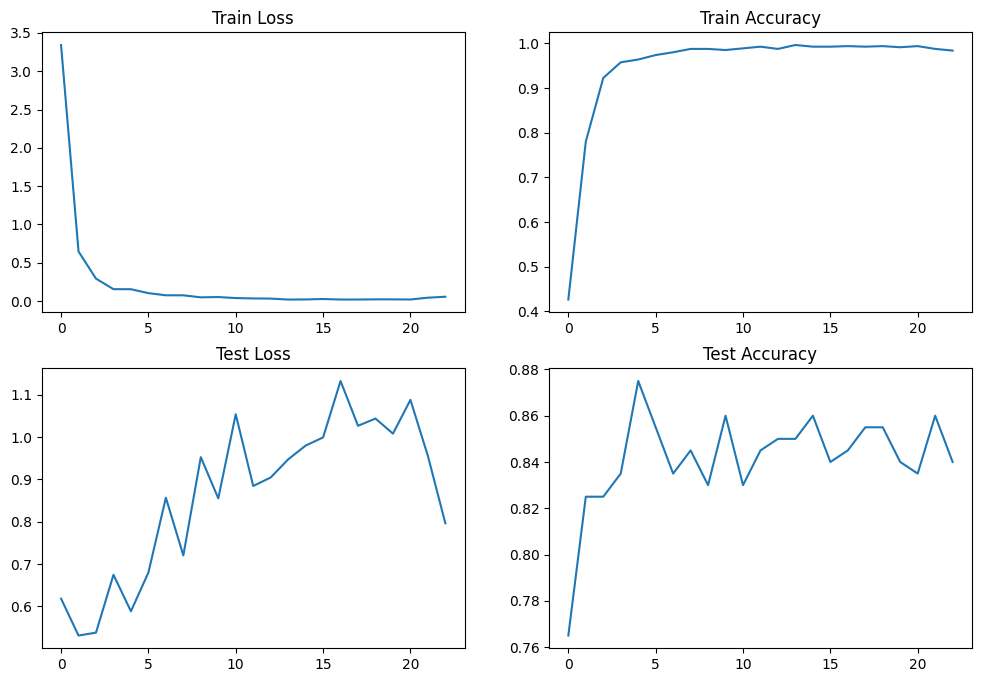

Epoch 24 - Layer 1 - Train Loss: 6.8296 - Train Acc: 0.0000
Epoch 24 - Layer 2 - Train Loss: 6.5020 - Train Acc: 0.0000
Epoch 24 - Layer 3 - Train Loss: 6.3930 - Train Acc: 0.1250
Epoch 24 - Layer 4 - Train Loss: 6.1515 - Train Acc: 6.7500
Epoch 24 - Layer 5 - Train Loss: 5.6462 - Train Acc: 15.5000
Epoch 24 - Layer 6 - Train Loss: 5.6215 - Train Acc: 22.0000
Epoch 24 - Layer 7 - Train Loss: 5.2554 - Train Acc: 45.3750
Epoch 24 - Layer 8 - Train Loss: 4.1821 - Train Acc: 51.3750
Epoch 24 - Layer 9 - Train Loss: 3.5780 - Train Acc: 61.0000
Epoch 24 - Layer 10 - Train Loss: 2.3073 - Train Acc: 74.2500
Epoch 24 - Layer 11 - Train Loss: 0.7761 - Train Acc: 92.5000
Epoch 24 - Layer 12 - Train Loss: 0.1381 - Train Acc: 97.6250
Epoch 24 - Train Loss: 0.0386 - Train Acc: 99.1250
Epoch 24 - Layer 1 - Test Loss: 6.7647 - Test Acc: 0.0000
Epoch 24 - Layer 2 - Test Loss: 6.4630 - Test Acc: 0.0000
Epoch 24 - Layer 3 - Test Loss: 6.3280 - Test Acc: 0.4464
Epoch 24 - Layer 4 - Test Loss: 6.0669 - Tes

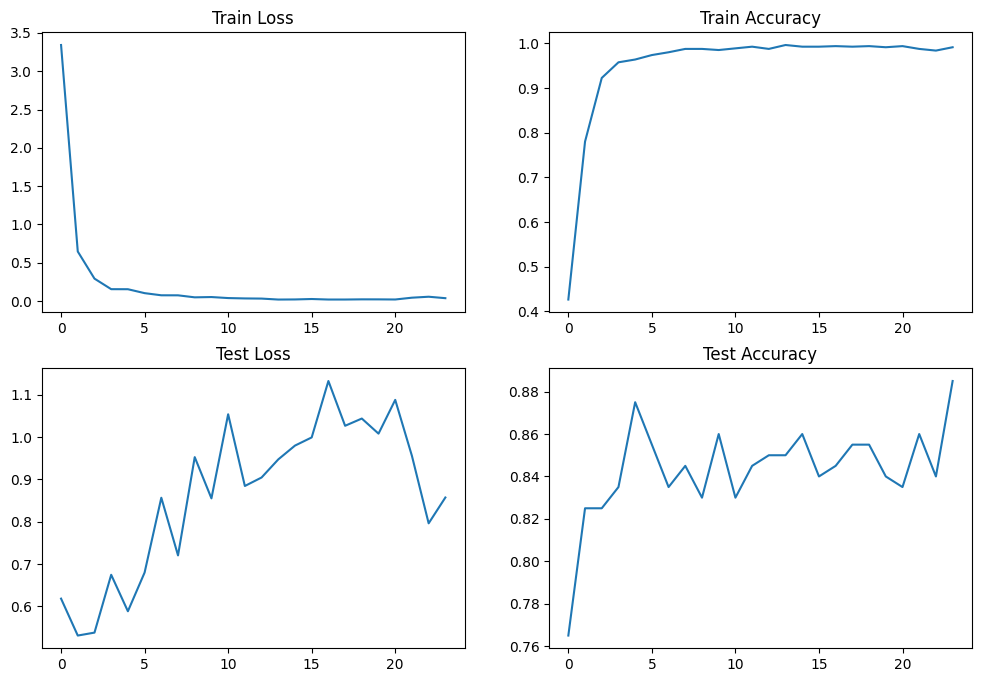

Epoch 25 - Layer 1 - Train Loss: 6.8348 - Train Acc: 0.0000
Epoch 25 - Layer 2 - Train Loss: 6.5033 - Train Acc: 0.0000
Epoch 25 - Layer 3 - Train Loss: 6.3852 - Train Acc: 0.5000
Epoch 25 - Layer 4 - Train Loss: 6.1535 - Train Acc: 6.7500
Epoch 25 - Layer 5 - Train Loss: 5.6151 - Train Acc: 15.8750
Epoch 25 - Layer 6 - Train Loss: 5.6250 - Train Acc: 19.2500
Epoch 25 - Layer 7 - Train Loss: 5.2454 - Train Acc: 44.7500
Epoch 25 - Layer 8 - Train Loss: 4.1820 - Train Acc: 52.2500
Epoch 25 - Layer 9 - Train Loss: 3.5514 - Train Acc: 63.8750
Epoch 25 - Layer 10 - Train Loss: 2.1688 - Train Acc: 79.2500
Epoch 25 - Layer 11 - Train Loss: 0.7531 - Train Acc: 92.8750
Epoch 25 - Layer 12 - Train Loss: 0.1264 - Train Acc: 97.3750
Epoch 25 - Train Loss: 0.0481 - Train Acc: 98.7500
Epoch 25 - Layer 1 - Test Loss: 6.7647 - Test Acc: 0.0000
Epoch 25 - Layer 2 - Test Loss: 6.4685 - Test Acc: 0.0000
Epoch 25 - Layer 3 - Test Loss: 6.3136 - Test Acc: 0.4464
Epoch 25 - Layer 4 - Test Loss: 6.0460 - Tes

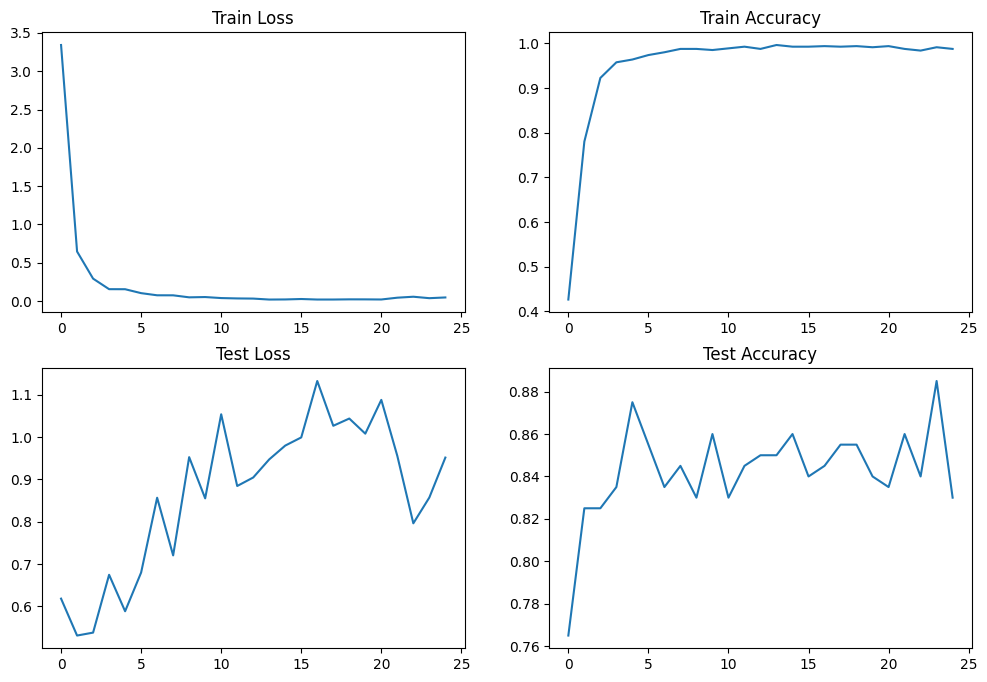

Epoch 26 - Layer 1 - Train Loss: 6.8274 - Train Acc: 0.0000
Epoch 26 - Layer 2 - Train Loss: 6.4965 - Train Acc: 0.0000
Epoch 26 - Layer 3 - Train Loss: 6.3798 - Train Acc: 0.0000
Epoch 26 - Layer 4 - Train Loss: 6.1329 - Train Acc: 7.0000
Epoch 26 - Layer 5 - Train Loss: 5.6088 - Train Acc: 22.1250
Epoch 26 - Layer 6 - Train Loss: 5.6271 - Train Acc: 22.8750
Epoch 26 - Layer 7 - Train Loss: 5.2383 - Train Acc: 44.8750
Epoch 26 - Layer 8 - Train Loss: 4.0977 - Train Acc: 53.5000
Epoch 26 - Layer 9 - Train Loss: 3.4509 - Train Acc: 63.6250
Epoch 26 - Layer 10 - Train Loss: 2.0832 - Train Acc: 79.1250
Epoch 26 - Layer 11 - Train Loss: 0.6724 - Train Acc: 95.2500
Epoch 26 - Layer 12 - Train Loss: 0.0916 - Train Acc: 98.6250
Epoch 26 - Train Loss: 0.0279 - Train Acc: 98.7500
Epoch 26 - Layer 1 - Test Loss: 6.7641 - Test Acc: 0.0000
Epoch 26 - Layer 2 - Test Loss: 6.4642 - Test Acc: 0.0000
Epoch 26 - Layer 3 - Test Loss: 6.3195 - Test Acc: 0.0000
Epoch 26 - Layer 4 - Test Loss: 6.0223 - Tes

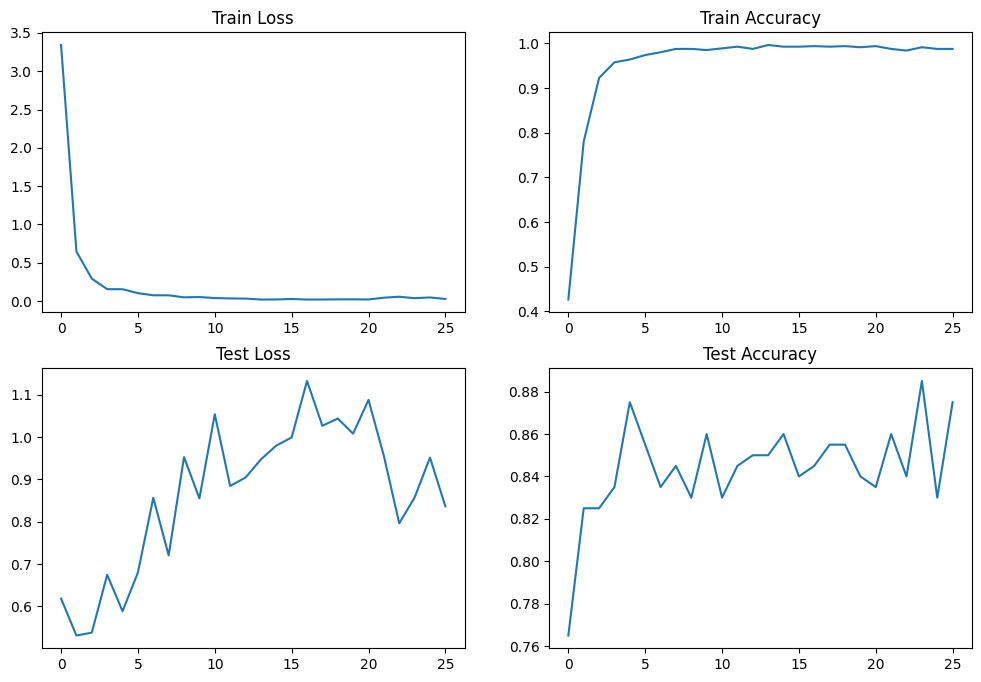

Epoch 27 - Layer 1 - Train Loss: 6.8276 - Train Acc: 0.0000
Epoch 27 - Layer 2 - Train Loss: 6.4959 - Train Acc: 0.0000
Epoch 27 - Layer 3 - Train Loss: 6.3680 - Train Acc: 0.0000
Epoch 27 - Layer 4 - Train Loss: 6.1174 - Train Acc: 8.2500
Epoch 27 - Layer 5 - Train Loss: 5.6111 - Train Acc: 25.7500
Epoch 27 - Layer 6 - Train Loss: 5.6303 - Train Acc: 24.2500
Epoch 27 - Layer 7 - Train Loss: 5.2316 - Train Acc: 46.5000
Epoch 27 - Layer 8 - Train Loss: 4.1240 - Train Acc: 52.0000
Epoch 27 - Layer 9 - Train Loss: 3.4392 - Train Acc: 62.8750
Epoch 27 - Layer 10 - Train Loss: 2.0991 - Train Acc: 80.0000
Epoch 27 - Layer 11 - Train Loss: 0.6806 - Train Acc: 94.1250
Epoch 27 - Layer 12 - Train Loss: 0.1021 - Train Acc: 97.8750
Epoch 27 - Train Loss: 0.0406 - Train Acc: 98.7500
Epoch 27 - Layer 1 - Test Loss: 6.7651 - Test Acc: 0.0000
Epoch 27 - Layer 2 - Test Loss: 6.4618 - Test Acc: 0.0000
Epoch 27 - Layer 3 - Test Loss: 6.3167 - Test Acc: 0.0000
Epoch 27 - Layer 4 - Test Loss: 6.0319 - Tes

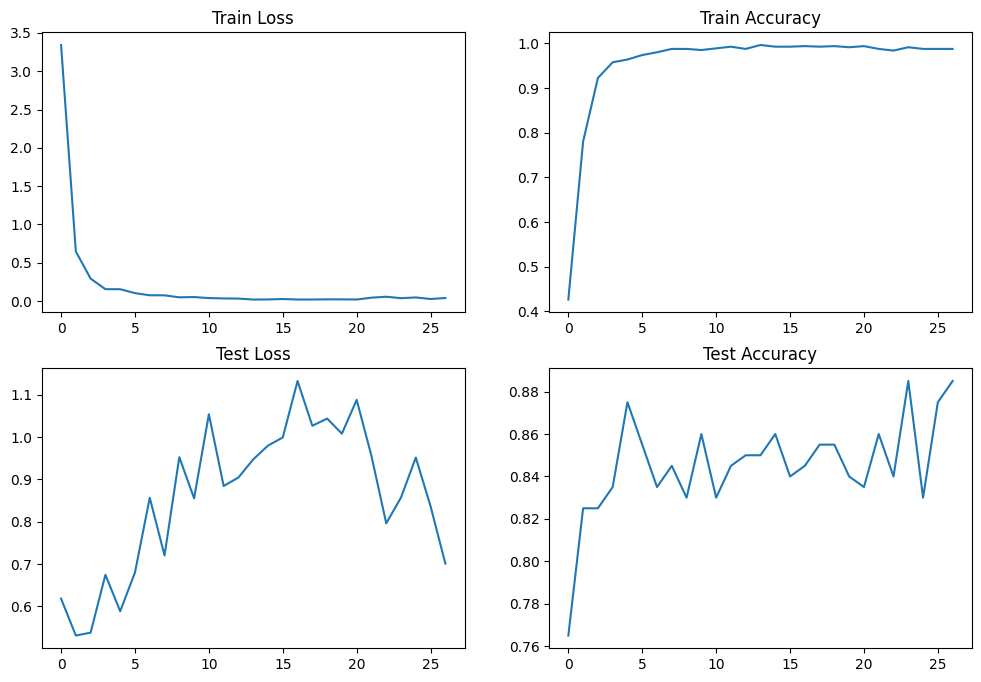

Epoch 28 - Layer 1 - Train Loss: 6.8284 - Train Acc: 0.0000
Epoch 28 - Layer 2 - Train Loss: 6.5000 - Train Acc: 0.0000
Epoch 28 - Layer 3 - Train Loss: 6.3724 - Train Acc: 0.0000
Epoch 28 - Layer 4 - Train Loss: 6.1277 - Train Acc: 9.0000
Epoch 28 - Layer 5 - Train Loss: 5.7009 - Train Acc: 25.1250
Epoch 28 - Layer 6 - Train Loss: 5.7194 - Train Acc: 23.1250
Epoch 28 - Layer 7 - Train Loss: 5.3029 - Train Acc: 44.1250
Epoch 28 - Layer 8 - Train Loss: 4.1641 - Train Acc: 51.8750
Epoch 28 - Layer 9 - Train Loss: 3.5319 - Train Acc: 62.7500
Epoch 28 - Layer 10 - Train Loss: 2.2018 - Train Acc: 80.7500
Epoch 28 - Layer 11 - Train Loss: 0.6951 - Train Acc: 94.1250
Epoch 28 - Layer 12 - Train Loss: 0.1502 - Train Acc: 96.2500
Epoch 28 - Train Loss: 0.0505 - Train Acc: 98.6250
Epoch 28 - Layer 1 - Test Loss: 6.7648 - Test Acc: 0.0000
Epoch 28 - Layer 2 - Test Loss: 6.4621 - Test Acc: 0.0000
Epoch 28 - Layer 3 - Test Loss: 6.3141 - Test Acc: 0.0000
Epoch 28 - Layer 4 - Test Loss: 6.0216 - Tes

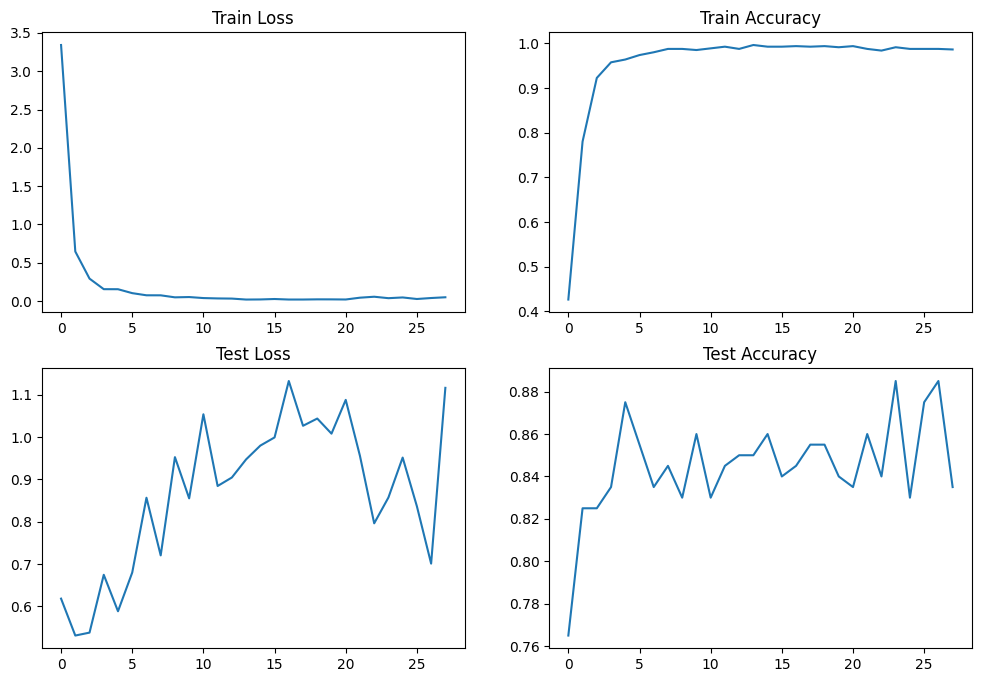

Epoch 29 - Layer 1 - Train Loss: 6.8309 - Train Acc: 0.0000
Epoch 29 - Layer 2 - Train Loss: 6.4969 - Train Acc: 0.0000
Epoch 29 - Layer 3 - Train Loss: 6.3754 - Train Acc: 0.0000
Epoch 29 - Layer 4 - Train Loss: 6.1195 - Train Acc: 9.2500
Epoch 29 - Layer 5 - Train Loss: 5.6566 - Train Acc: 29.1250
Epoch 29 - Layer 6 - Train Loss: 5.6739 - Train Acc: 27.5000
Epoch 29 - Layer 7 - Train Loss: 5.2300 - Train Acc: 45.5000
Epoch 29 - Layer 8 - Train Loss: 4.1462 - Train Acc: 53.0000
Epoch 29 - Layer 9 - Train Loss: 3.5276 - Train Acc: 63.0000
Epoch 29 - Layer 10 - Train Loss: 2.1583 - Train Acc: 83.2500
Epoch 29 - Layer 11 - Train Loss: 0.6911 - Train Acc: 95.5000
Epoch 29 - Layer 12 - Train Loss: 0.0937 - Train Acc: 98.7500
Epoch 29 - Train Loss: 0.0308 - Train Acc: 99.2500
Epoch 29 - Layer 1 - Test Loss: 6.7645 - Test Acc: 0.0000
Epoch 29 - Layer 2 - Test Loss: 6.4618 - Test Acc: 0.0000
Epoch 29 - Layer 3 - Test Loss: 6.3236 - Test Acc: 0.0000
Epoch 29 - Layer 4 - Test Loss: 6.0235 - Tes

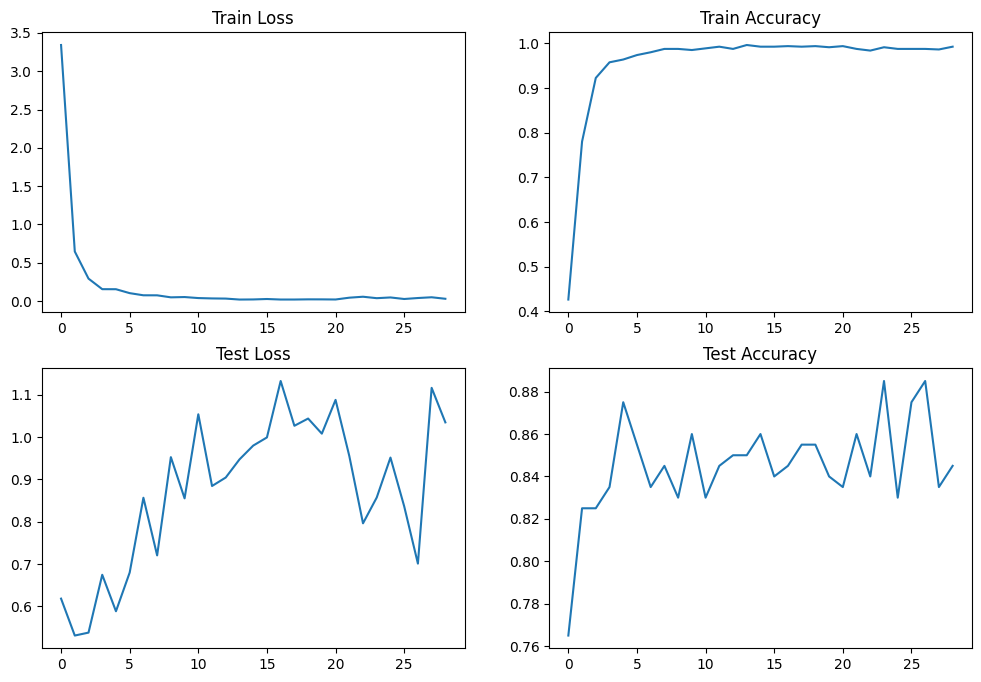

Epoch 30 - Layer 1 - Train Loss: 6.8265 - Train Acc: 0.0000
Epoch 30 - Layer 2 - Train Loss: 6.4993 - Train Acc: 0.0000
Epoch 30 - Layer 3 - Train Loss: 6.3829 - Train Acc: 0.0000
Epoch 30 - Layer 4 - Train Loss: 6.1192 - Train Acc: 9.0000
Epoch 30 - Layer 5 - Train Loss: 5.6251 - Train Acc: 30.7500
Epoch 30 - Layer 6 - Train Loss: 5.6344 - Train Acc: 28.8750
Epoch 30 - Layer 7 - Train Loss: 5.1795 - Train Acc: 44.7500
Epoch 30 - Layer 8 - Train Loss: 4.1083 - Train Acc: 52.2500
Epoch 30 - Layer 9 - Train Loss: 3.4680 - Train Acc: 65.1250
Epoch 30 - Layer 10 - Train Loss: 2.1003 - Train Acc: 85.3750
Epoch 30 - Layer 11 - Train Loss: 0.6345 - Train Acc: 95.8750
Epoch 30 - Layer 12 - Train Loss: 0.0682 - Train Acc: 98.7500
Epoch 30 - Train Loss: 0.0214 - Train Acc: 99.3750
Epoch 30 - Layer 1 - Test Loss: 6.7644 - Test Acc: 0.0000
Epoch 30 - Layer 2 - Test Loss: 6.4627 - Test Acc: 0.0000
Epoch 30 - Layer 3 - Test Loss: 6.3286 - Test Acc: 0.0000
Epoch 30 - Layer 4 - Test Loss: 6.0248 - Tes

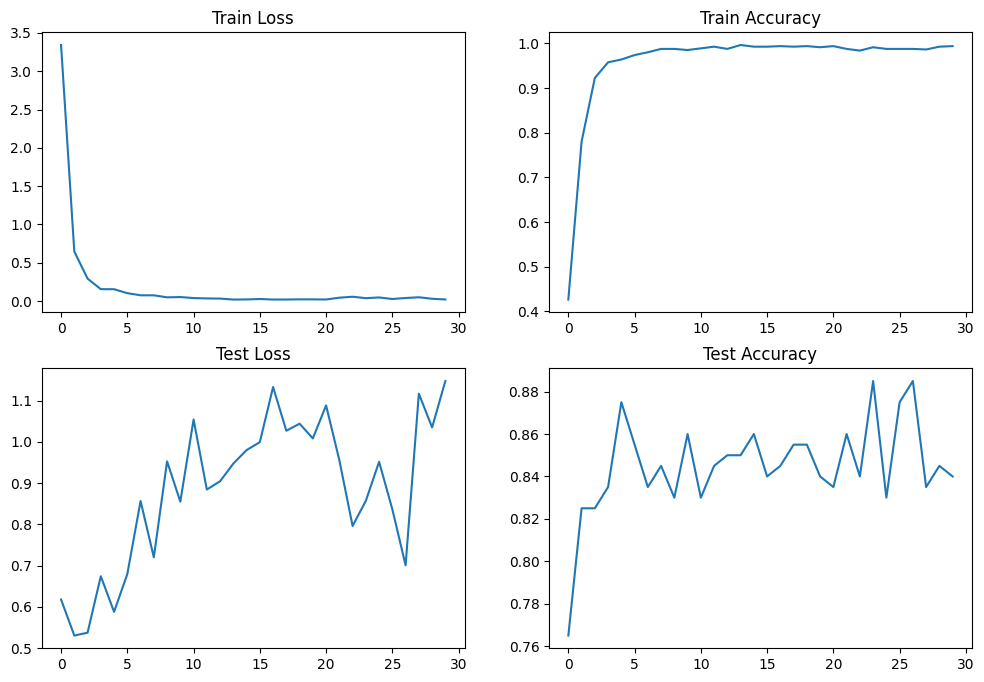

In [57]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score

# Define the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/NEEWWWWW/DATA_NEW/PC/1000/train_800.csv")
test_data = pd.read_csv("/content/drive/MyDrive/NEEWWWWW/DATA_NEW/PC/1000/test_200.csv")

# Define the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model.to(device)

# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.df.iloc[idx]['text']
        label = self.df.iloc[idx]['label']
        
        inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)
        
        return {'input_ids': input_ids.to(device), 'attention_mask': attention_mask.to(device), 'label': torch.tensor(label).to(device)}

# Define the data loaders
train_dataset = CustomDataset(train_data)
test_dataset = CustomDataset(test_data)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the training and testing functions
def train(model, train_loader, optimizer, criterion):
    model.train()
    train_loss = 0
    train_acc = 0
    total = 0
    layer_train_loss_data = []
    layer_train_acc_data = []
    
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.last_hidden_state[:, 0, :]
        loss = criterion(logits, labels)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * len(input_ids)
        train_acc += accuracy_score(labels.cpu().numpy(), np.argmax(logits.cpu().detach().numpy(), axis=1)) * len(input_ids)
        total += len(input_ids)
        
        for i in range(12):
            # Calculate the loss and accuracy for this layer
            layer_logits = outputs.hidden_states[i][:, 0, :]
            layer_loss = criterion(layer_logits, labels)
            layer_preds = np.argmax(layer_logits.cpu().detach().numpy(), axis=1)
            layer_labels = labels.cpu().numpy()
            layer_acc = accuracy_score(layer_labels, layer_preds)
            layer_train_loss_data.append(layer_loss.item())
            layer_train_acc_data.append(layer_acc)

    # Print the loss and accuracy for each layer
    for i in range(12):
        layer_train_loss = np.mean(layer_train_loss_data[i::12])
        layer_train_acc = np.mean(layer_train_acc_data[i::12])
        print(f"Epoch {epoch+1} - Layer {i+1} - Train Loss: {layer_train_loss:.4f} - Train Acc: {layer_train_acc*100:.4f}")
    
    return train_loss / total, train_acc / total


def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    test_acc = 0
    total = 0
    hidden_states = [[] for _ in range(12)]
    layer_test_loss_data = []
    layer_test_acc_data = []
    
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['label']
            
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.last_hidden_state[:, 0, :]
            loss = criterion(logits, labels)
            
            test_loss += loss.item() * len(input_ids)
            test_acc += accuracy_score(labels.cpu().numpy(), np.argmax(logits.cpu().detach().numpy(), axis=1)) * len(input_ids)
            total += len(input_ids)
            
            for i in range(12):
                hidden_states[i].append(outputs.hidden_states[i].cpu().detach().numpy())
                
                # Calculate the loss and accuracy for this layer
                layer_logits = outputs.hidden_states[i][:, 0, :]
                layer_loss = criterion(layer_logits, labels)
                layer_preds = np.argmax(layer_logits.cpu().detach().numpy(), axis=1)
                layer_labels = labels.cpu().numpy()
                layer_acc = accuracy_score(layer_labels, layer_preds)
                layer_test_loss_data.append(layer_loss.item())
                layer_test_acc_data.append(layer_acc)

    # Print the loss and accuracy for each layer
    for i in range(12):
        layer_test_loss = np.mean(layer_test_loss_data[i::12])
        layer_test_acc = np.mean(layer_test_acc_data[i::12])
        print(f"Epoch {epoch+1} - Layer {i+1} - Test Loss: {layer_test_loss:.4f} - Test Acc: {layer_test_acc*100:.4f}")
        
    return test_loss / total, test_acc / total, hidden_states

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Train the model for 30 epochs
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(30):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f} - Train Acc: {train_acc*100:.4f}")
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    test_loss, test_acc, hidden_states = test(model, test_loader, criterion)
    print(f"Epoch {epoch+1} - Test Loss: {test_loss:.4f} - Test Acc: {test_acc*100:.4f}")
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    # Plot the train and test losses and accuracies
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title('Train Loss')
    axs[0, 1].plot(train_accs)
    axs[0, 1].set_title('Train Accuracy')
    axs[1, 0].plot(test_losses)
    axs[1, 0].set_title('Test Loss')
    axs[1, 1].plot(test_accs)
    axs[1, 1].set_title('Test Accuracy')
    plt.show()

In [44]:
import torch
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/NEEWWWWW/DATA_NEW/PC/1000/train_800.csv")
test_data = pd.read_csv("/content/drive/MyDrive/NEEWWWWW/DATA_NEW/PC/1000/test_200.csv")

# Define the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model.to(device)

# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.df.iloc[idx]['text']
        label = self.df.iloc[idx]['label']
        
        inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)
        
        return {'input_ids': input_ids.to(device), 'attention_mask': attention_mask.to(device), 'label': torch.tensor(label).to(device)}

# Define the data loaders
train_dataset = CustomDataset(train_data)
test_dataset = CustomDataset(test_data)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the training and testing functions
def train(model, train_loader, optimizer, criterion):
    model.train()
    train_loss = 0
    train_acc = 0
    total = 0
    layer_train_loss_data = []
    layer_train_acc_data = []
    
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.last_hidden_state[:, 0, :]
        loss = criterion(logits, labels)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * len(input_ids)
        train_acc += accuracy_score(labels.cpu().numpy(), np.argmax(logits.cpu().detach().numpy(), axis=1)) * len(input_ids)
        total += len(input_ids)
        
        for i in range(12):
            # Calculate the loss and accuracy for this layer
            layer_logits = outputs.hidden_states[i][:, 0, :]
            layer_loss = criterion(layer_logits, labels)
            layer_preds = np.argmax(layer_logits.cpu().detach().numpy(), axis=1)
            layer_labels = labels.cpu().numpy()
            layer_acc = accuracy_score(layer_labels, layer_preds)
            layer_train_loss_data.append(layer_loss.item())
            layer_train_acc_data.append(layer_acc)

    # Calculate the average loss and accuracy for each layer
    layer_train_loss = [np.mean(layer_train_loss_data[i::12]) for i in range(12)]
    layer_train_acc = [np.mean(layer_train_acc_data[i::12]) for i in range(12)]
    
    # Calculate the overall train loss and accuracy
    overall_train_loss = train_loss / total
    overall_train_acc = train_acc / total
    
    return overall_train_loss, overall_train_acc, layer_train_loss, layer_train_acc


def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    test_acc = 0
    total = 0
    hidden_states = [[] for _ in range(12)]
    layer_test_loss_data = []
    layer_test_acc_data = []
    
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['label']
            
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.last_hidden_state[:, 0, :]
            loss = criterion(logits, labels)
            
            test_loss += loss.item() * len(input_ids)
            test_acc += accuracy_score(labels.cpu().numpy(), np.argmax(logits.cpu().detach().numpy(), axis=1)) * len(input_ids)
            total += len(input_ids)
            
            for i in range(12):
                hidden_states[i].append(outputs.hidden_states[i].cpu().detach().numpy())
                
                # Calculate the loss and accuracy for this layer
                layer_logits = outputs.hidden_states[i][:, 0, :]
                layer_loss = criterion(layer_logits, labels)
                layer_preds = np.argmax(layer_logits.cpu().detach().numpy(), axis=1)
                layer_labels = labels.cpu().numpy()
                layer_acc = accuracy_score(layer_labels, layer_preds)
                layer_test_loss_data.append(layer_loss.item())
                layer_test_acc_data.append(layer_acc)

    # Calculate the average loss and accuracy for each layer
    layer_test_loss = [np.mean(layer_test_loss_data[i::12]) for i in range(12)]
    layer_test_acc = [np.mean(layer_test_acc_data[i::12]) for i in range(12)]
        
    # Calculate the overall test loss and accuracy
    overall_test_loss = test_loss / total
    overall_test_acc = test_acc / total
    
    return overall_test_loss, overall_test_acc, layer_test_loss, layer_test_acc, hidden_states

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Train the model for 10 epochs
epochs = 10
train_losses = []
train_accs = []
test_losses = []
test_accs = []
layer_train_losses = [[] for _ in range(12)]
layer_train_accs = [[] for _ in range(12)]
layer_test_losses = [[] for _ in range(12)]
layer_test_accs = [[] for _ in range(12)]
for epoch in range(epochs):
    train_loss, train_acc, layer_train_loss, layer_train_acc = train(model, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    for i in range(12):
        layer_train_losses[i].append(layer_train_loss[i])
        layer_train_accs[i].append(layer_train_acc[i])
    
    test_loss, test_acc, layer_test_loss, layer_test_acc, hidden_states = test(model, test_loader, criterion)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    for i in range(12):
        layer_test_losses[i].append(layer_test_loss[i])
        layer_test_accs[i].append(layer_test_acc[i])
    
    print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f} - Train Acc: {train_acc*100:.4f}")
    print(f"Epoch {epoch+1} - Test Loss: {test_loss:.4f} - Test Acc: {test_acc*100:.4f}")



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1 - Train Loss: 3.2786 - Train Acc: 41.0000
Epoch 1 - Test Loss: 0.6077 - Test Acc: 76.0000
Epoch 2 - Train Loss: 0.6138 - Train Acc: 80.2500
Epoch 2 - Test Loss: 0.5171 - Test Acc: 84.0000
Epoch 3 - Train Loss: 0.3040 - Train Acc: 91.3750
Epoch 3 - Test Loss: 0.5645 - Test Acc: 84.0000
Epoch 4 - Train Loss: 0.1913 - Train Acc: 95.3750
Epoch 4 - Test Loss: 0.7172 - Test Acc: 86.0000
Epoch 5 - Train Loss: 0.1141 - Train Acc: 97.1250
Epoch 5 - Test Loss: 0.8964 - Test Acc: 82.0000
Epoch 6 - Train Loss: 0.1022 - Train Acc: 97.3750
Epoch 6 - Test Loss: 0.7642 - Test Acc: 86.0000
Epoch 7 - Train Loss: 0.0793 - Train Acc: 98.1250
Epoch 7 - Test Loss: 0.9418 - Test Acc: 82.0000
Epoch 8 - Train Loss: 0.0582 - Train Acc: 98.6250
Epoch 8 - Test Loss: 0.9856 - Test Acc: 81.0000
Epoch 9 - Train Loss: 0.0770 - Train Acc: 98.1250
Epoch 9 - Test Loss: 0.8795 - Test Acc: 86.0000
Epoch 10 - Train Loss: 0.0559 - Train Acc: 98.3750
Epoch 10 - Test Loss: 0.9136 - Test Acc: 86.5000


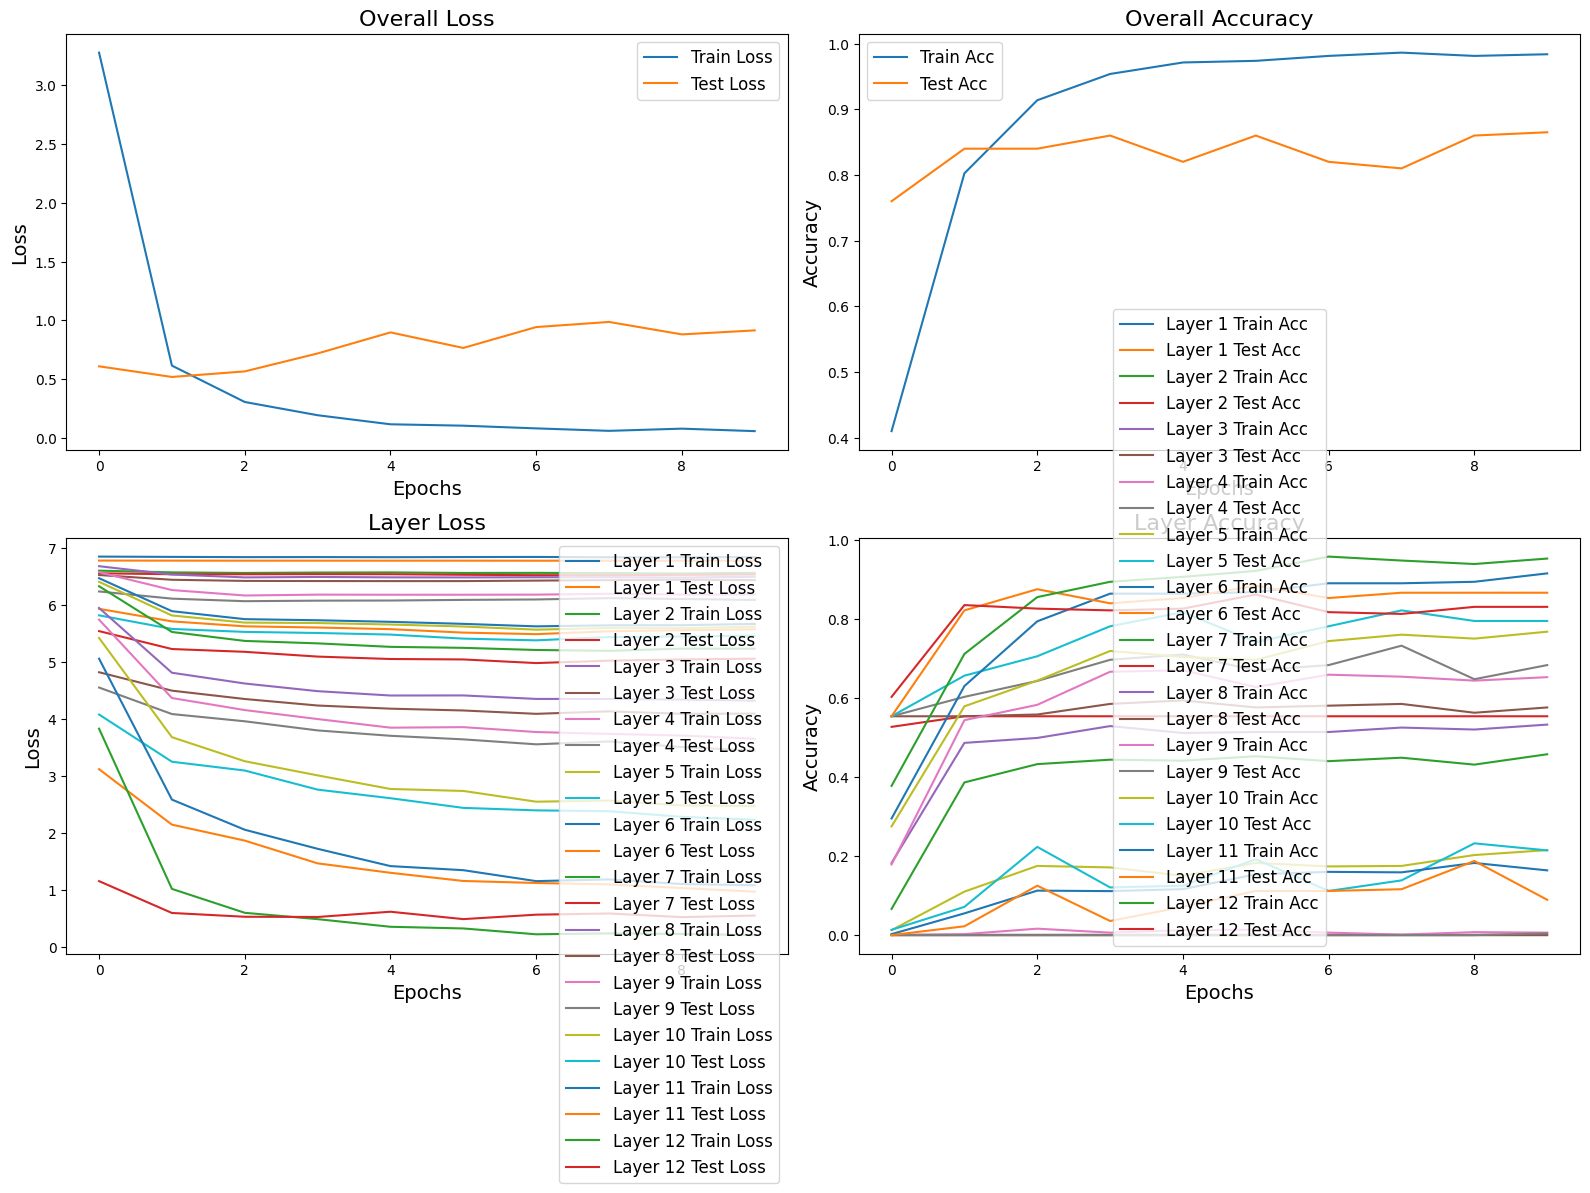

In [48]:
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(train_losses, label='Train Loss')
axs[0, 0].plot(test_losses, label='Test Loss')
axs[0, 0].set_xlabel('Epochs', fontsize=14)
axs[0, 0].set_ylabel('Loss', fontsize=14)
axs[0, 0].set_title('Overall Loss', fontsize=16)
axs[0, 0].legend(fontsize=12)

axs[0, 1].plot(train_accs, label='Train Acc')
axs[0, 1].plot(test_accs, label='Test Acc')
axs[0, 1].set_xlabel('Epochs', fontsize=14)
axs[0, 1].set_ylabel('Accuracy', fontsize=14)
axs[0, 1].set_title('Overall Accuracy', fontsize=16)
axs[0, 1].legend(fontsize=12)

for i in range(12):
    axs[1, 0].plot(layer_train_losses[i], label=f'Layer {i+1} Train Loss')
    axs[1, 0].plot(layer_test_losses[i], label=f'Layer {i+1} Test Loss')
    axs[1, 0].set_xlabel('Epochs', fontsize=14)
    axs[1, 0].set_ylabel('Loss', fontsize=14)
    axs[1, 0].set_title('Layer Loss', fontsize=16)
    axs[1, 0].legend(fontsize=12)

    axs[1, 1].plot(layer_train_accs[i], label=f'Layer {i+1} Train Acc')
    axs[1, 1].plot(layer_test_accs[i], label=f'Layer {i+1} Test Acc')
    axs[1, 1].set_xlabel('Epochs', fontsize=14)
    axs[1, 1].set_ylabel('Accuracy', fontsize=14)
    axs[1, 1].set_title('Layer Accuracy', fontsize=16)
    axs[1, 1].legend(fontsize=12)

plt.tight_layout()
plt.show()